In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cebra_datahelpers
import PCA_preprocessing
from scipy.ndimage import gaussian_filter1d
from scipy.stats import sem
import cv2
import pickle
import PCA_statstests
import sys
sys.path.append('pyvenn/')
import venn
import random
from scipy.spatial.distance import mahalanobis
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import svm
import sklearn
from sklearn.metrics import accuracy_score


## Instructions 
This python script run on the preprocessed data. Preprocessing code is also uploaded(beh_data_analysis.py, cebra_data_helpers.py)

This script performes PCA and relates to the Fig. 4d-g and Fig. 6c-e.


In [ ]:
#import dataset
partname = "snout"
l_mouse_name = ["M2498","M2502"] 
l_date =["20230414","20230414"]
l_rotation = [0,1]
l_data,l_data_25, l_data_shuffled,_, l_beh_lowdim, l_beh_shuffled, l_beh,l_beh_lowdim_cont,l_beh_shuffled_cont = cebra_datahelpers.load_datavariables(l_mouse_name, l_date, datatype=1, sorter="kilo", l_data_25_bool = True)

[]
[]


In [4]:
behaviour_trials,neural_trials,neural_trials_25,beh_withinarm, neural_within_arm, beh_timepoints  = PCA_preprocessing.get_raw_beh(l_data=l_data, l_data_25=l_data_25, l_beh_lowdim_cont=l_beh_lowdim_cont)

trials retained: 100.0
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Size([272, 39])
torch.Siz

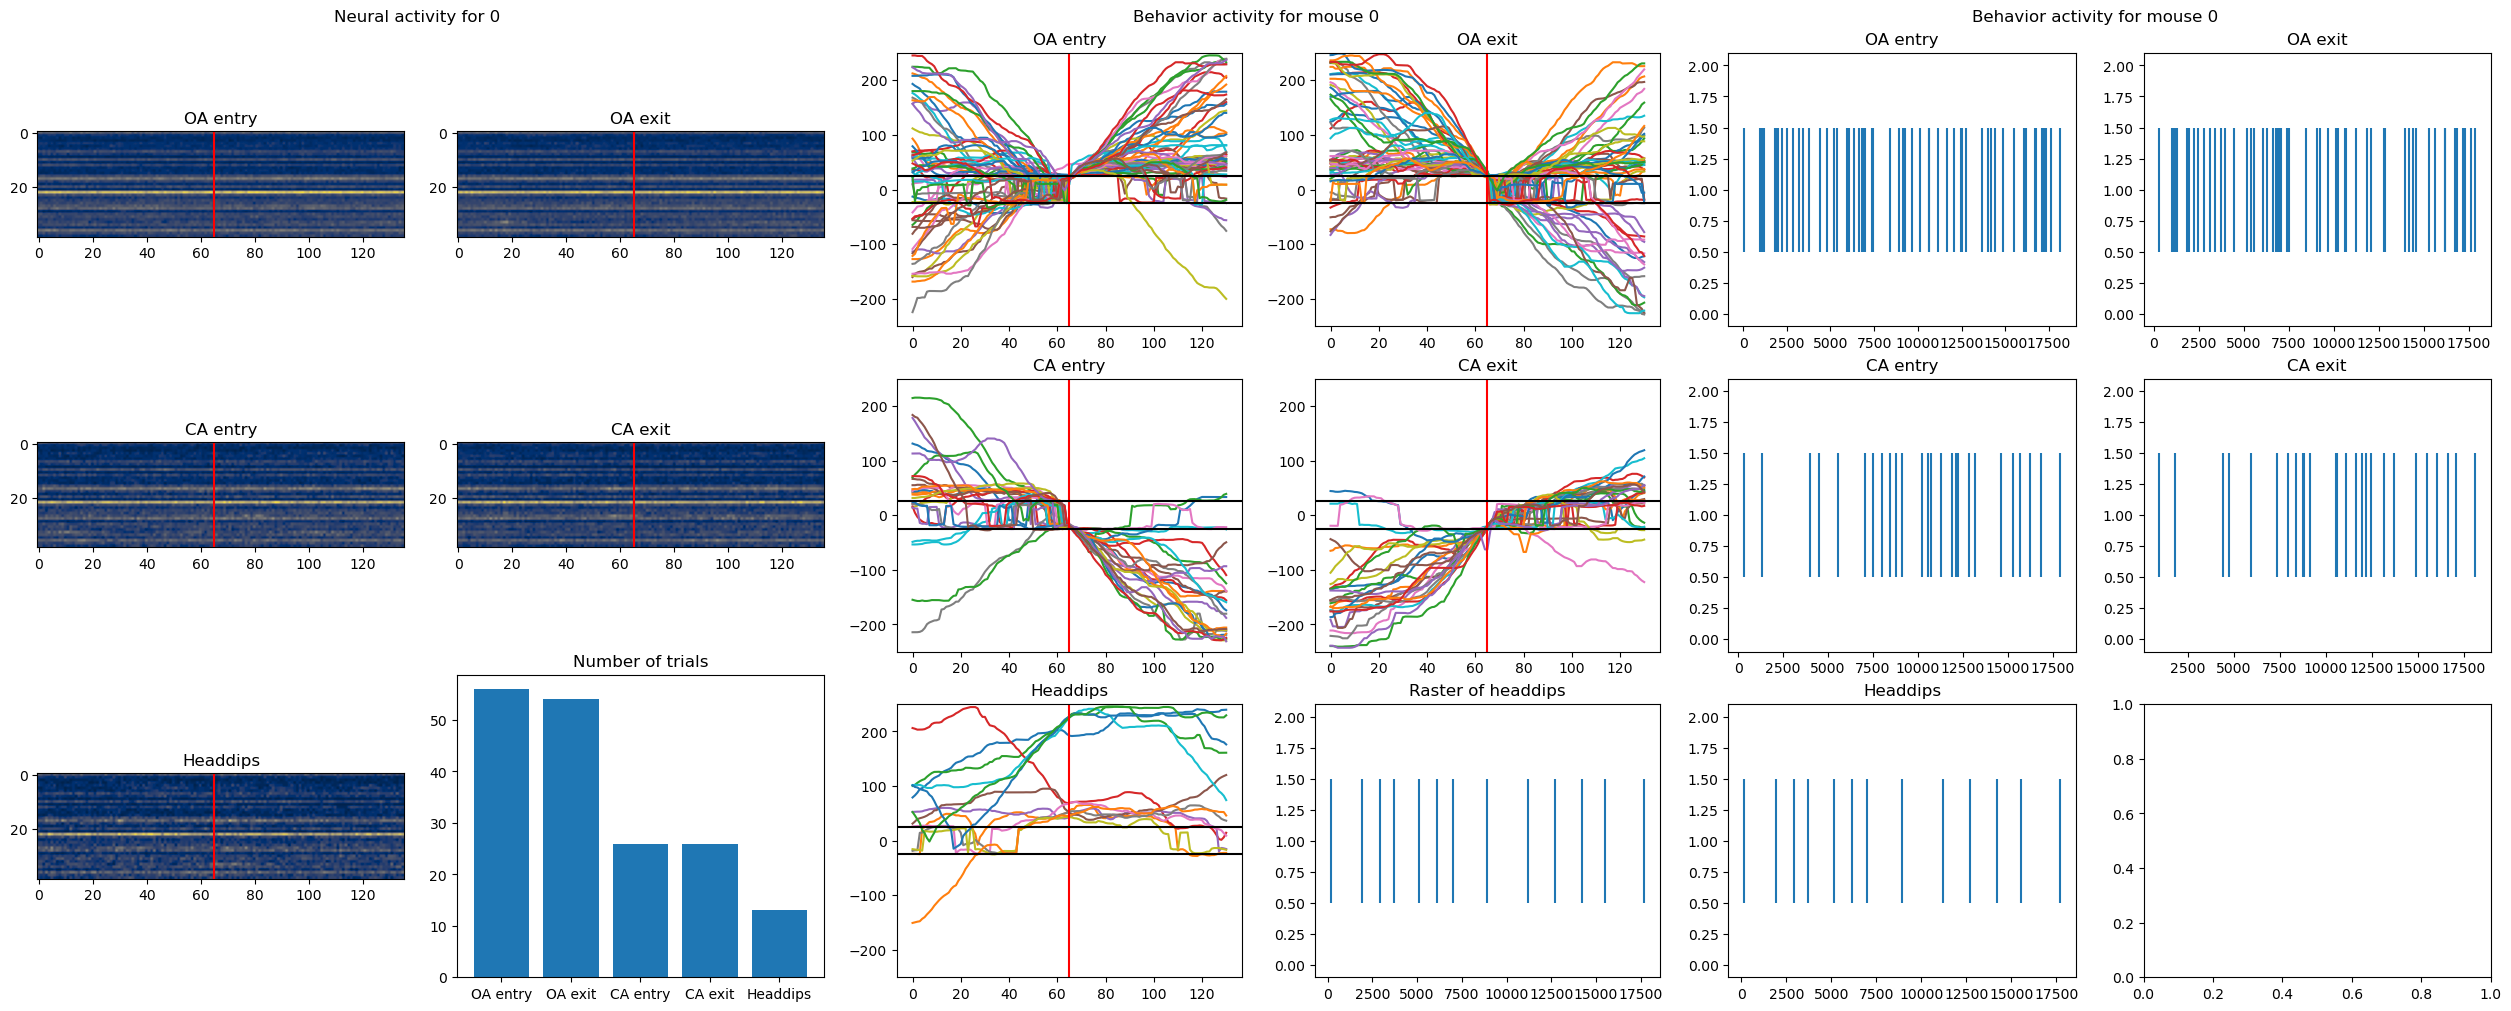

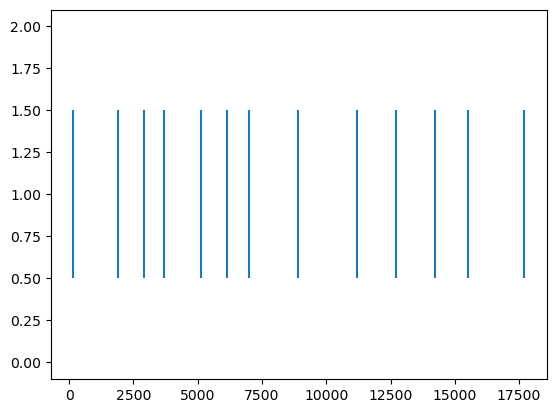

0
trials retained: 97.61904761904762
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 43])
torch.Size([272, 

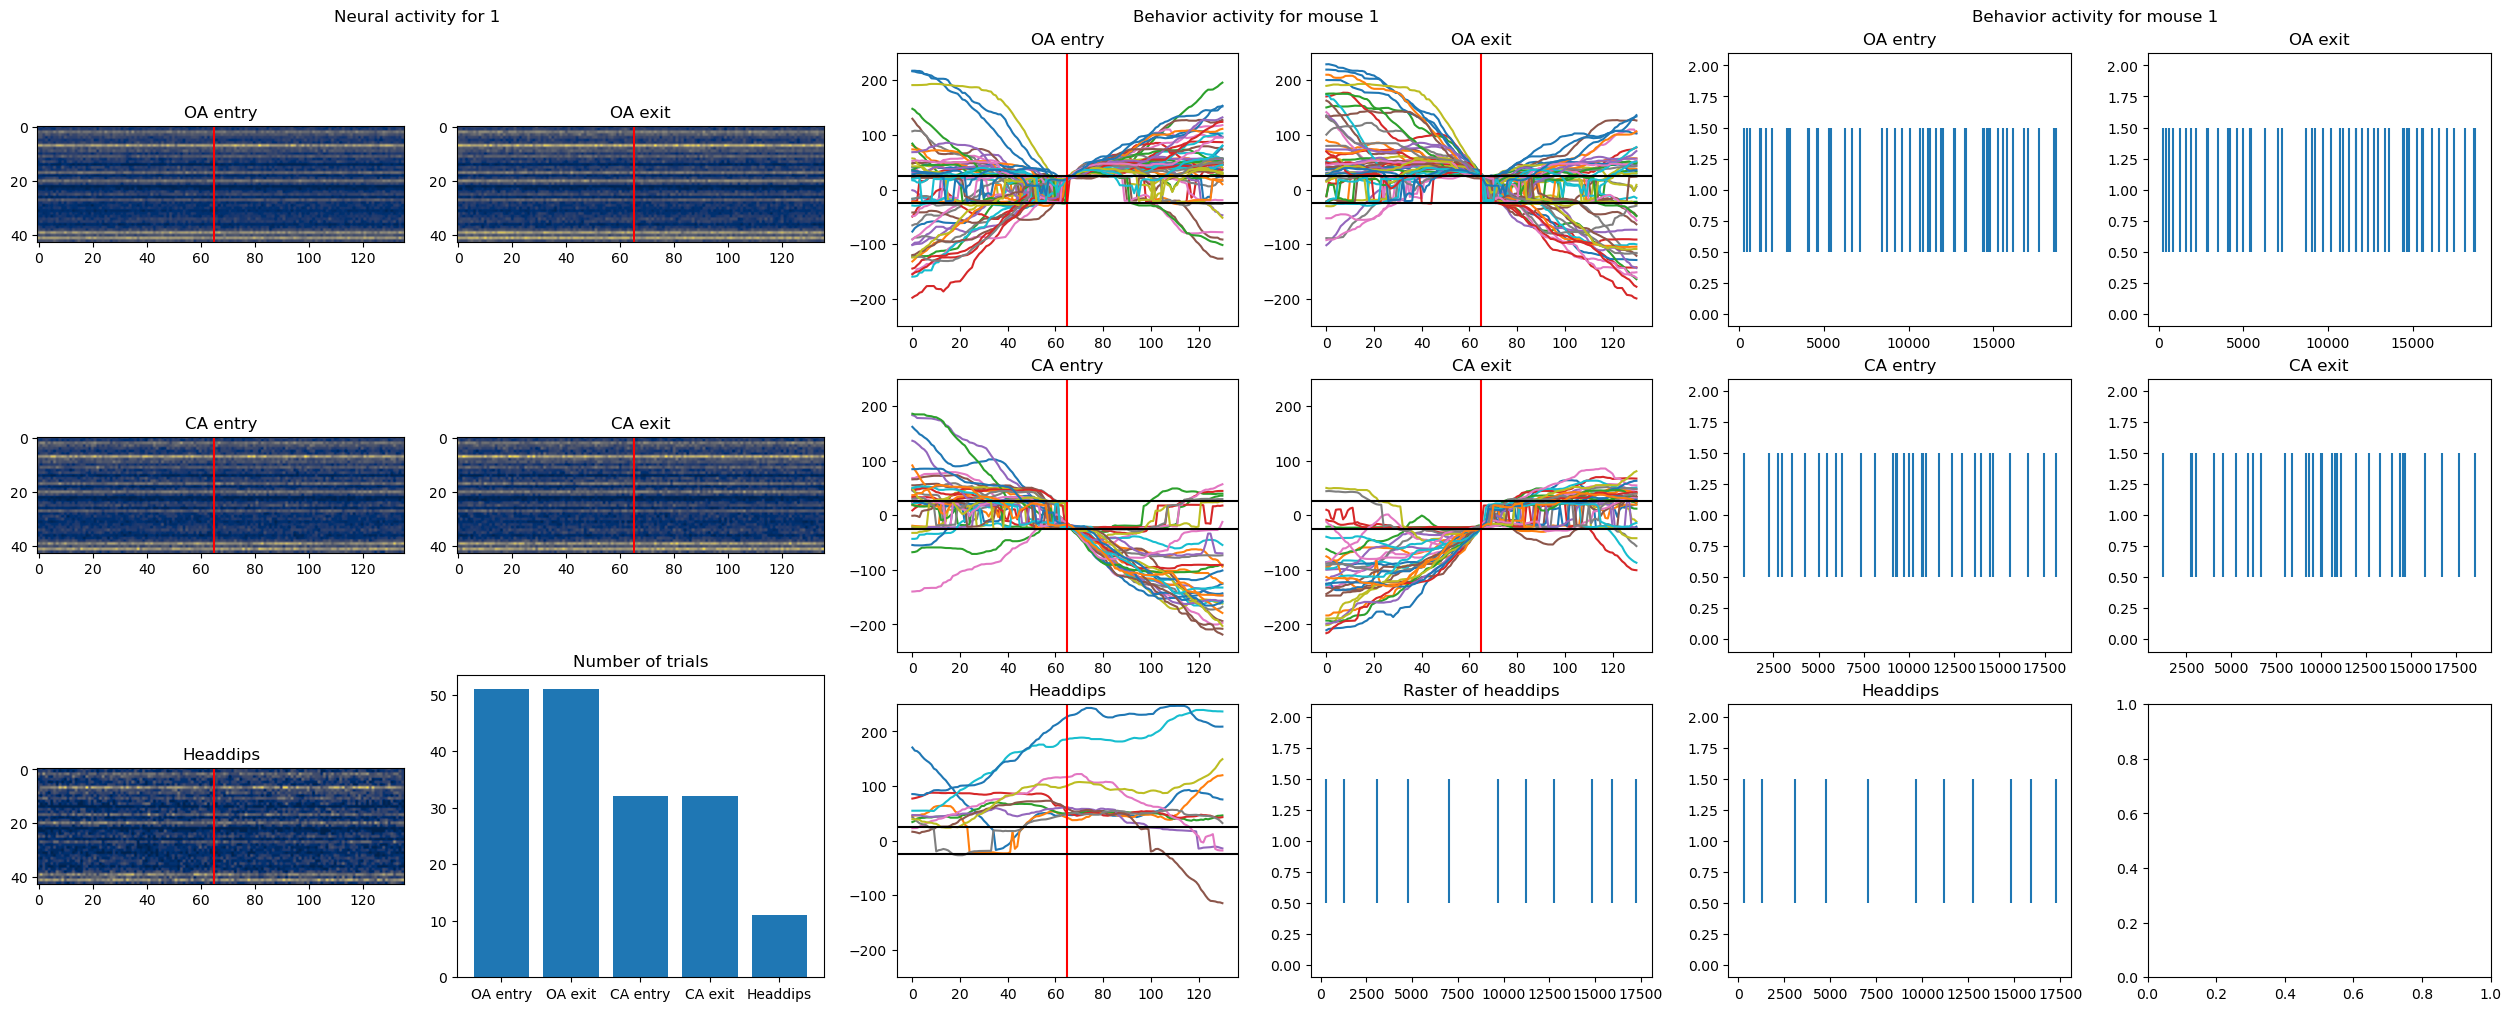

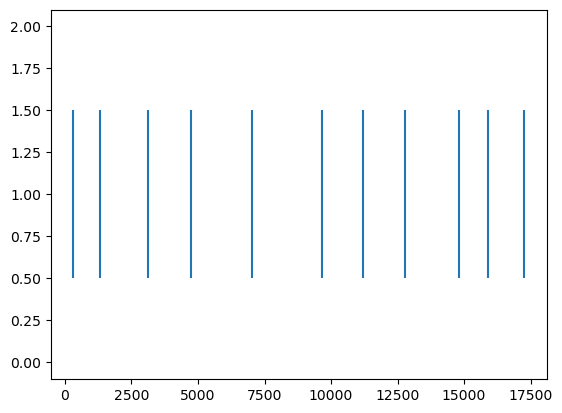

0


In [5]:
%matplotlib inline
allmice_behavior_avgtrials,allmice_neural_avgtrials, allmice_neural_avgtrials_25, allmice_dividedtrials,allmice_dividedtrials_25, allmice_dividedtrials_beh, time_trial = PCA_preprocessing.get_preprocessed_trials(l_mouse_name, behaviour_trials, neural_trials,neural_trials_25,beh_timepoints,'entryexit')

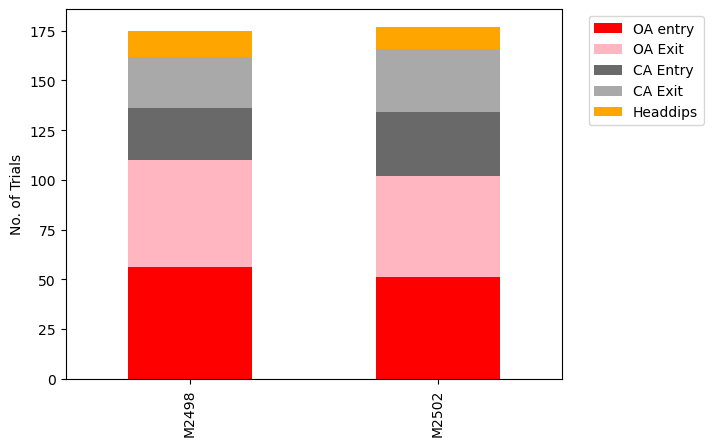

In [ ]:

%matplotlib inline
len(allmice_dividedtrials[0][-1])

trialnums_global = np.zeros((len(allmice_dividedtrials), len(allmice_dividedtrials[0])))
for i in range(trialnums_global.shape[0]):
    for j in range(trialnums_global.shape[-1]):
        trialnums_global[i,j] = len(allmice_dividedtrials[i][j])

df = pd.DataFrame({'OA entry': trialnums_global[0,:],
                   'OA Exit': trialnums_global[1,:],
                   'CA Entry': trialnums_global[2,:],
                   'CA Exit': trialnums_global[3,:],
                   'Headdips': trialnums_global[-1,:]},
                   index = l_mouse_name
)
colour=["red", "lightpink", "dimgrey", "darkgrey", "orange"]
df.plot(kind='bar', stacked=True, color=colour)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.ylabel('No. of Trials')
# plt.savefig('RESULTS/NOT-INJECTED/PCA_finalpicturesNew/Trialnums_EPM_entryexit.svg') 
plt.show()

In [7]:
# 50ms sliding window           
allmice_behavior_avgtrials_sliding = [None]*len(allmice_dividedtrials)
allmice_behavior_avgtrials_25_sliding = [None]*len(allmice_dividedtrials)
len_trial = allmice_neural_avgtrials[0].shape[-1]-5
len_trial_25 = allmice_neural_avgtrials_25[0].shape[-1]-10
window = 5 # 50 * 5 - 250ms + 50 ms sliding window
window_25 = 10 # 25ms bin * 10 

for i in range(len(allmice_dividedtrials)):
    allmice_behavior_avgtrials_sliding[i]= np.zeros((allmice_neural_avgtrials[i].shape[0],len_trial))
    for j in range(len_trial):
        allmice_behavior_avgtrials_sliding[i][:,j] = np.sum(allmice_neural_avgtrials[i][:,j:j+window], axis=1)

for i in range(len(allmice_dividedtrials_25)):
    allmice_behavior_avgtrials_25_sliding[i]= np.zeros((allmice_neural_avgtrials_25[i].shape[0],len_trial_25))
    for j in range(len_trial_25):
        allmice_behavior_avgtrials_25_sliding[i][:,j] = np.sum(allmice_neural_avgtrials_25[i][:,j:j+window_25], axis=1)

##### Single Unit Analysis - PCA and PCA stats

(82,)


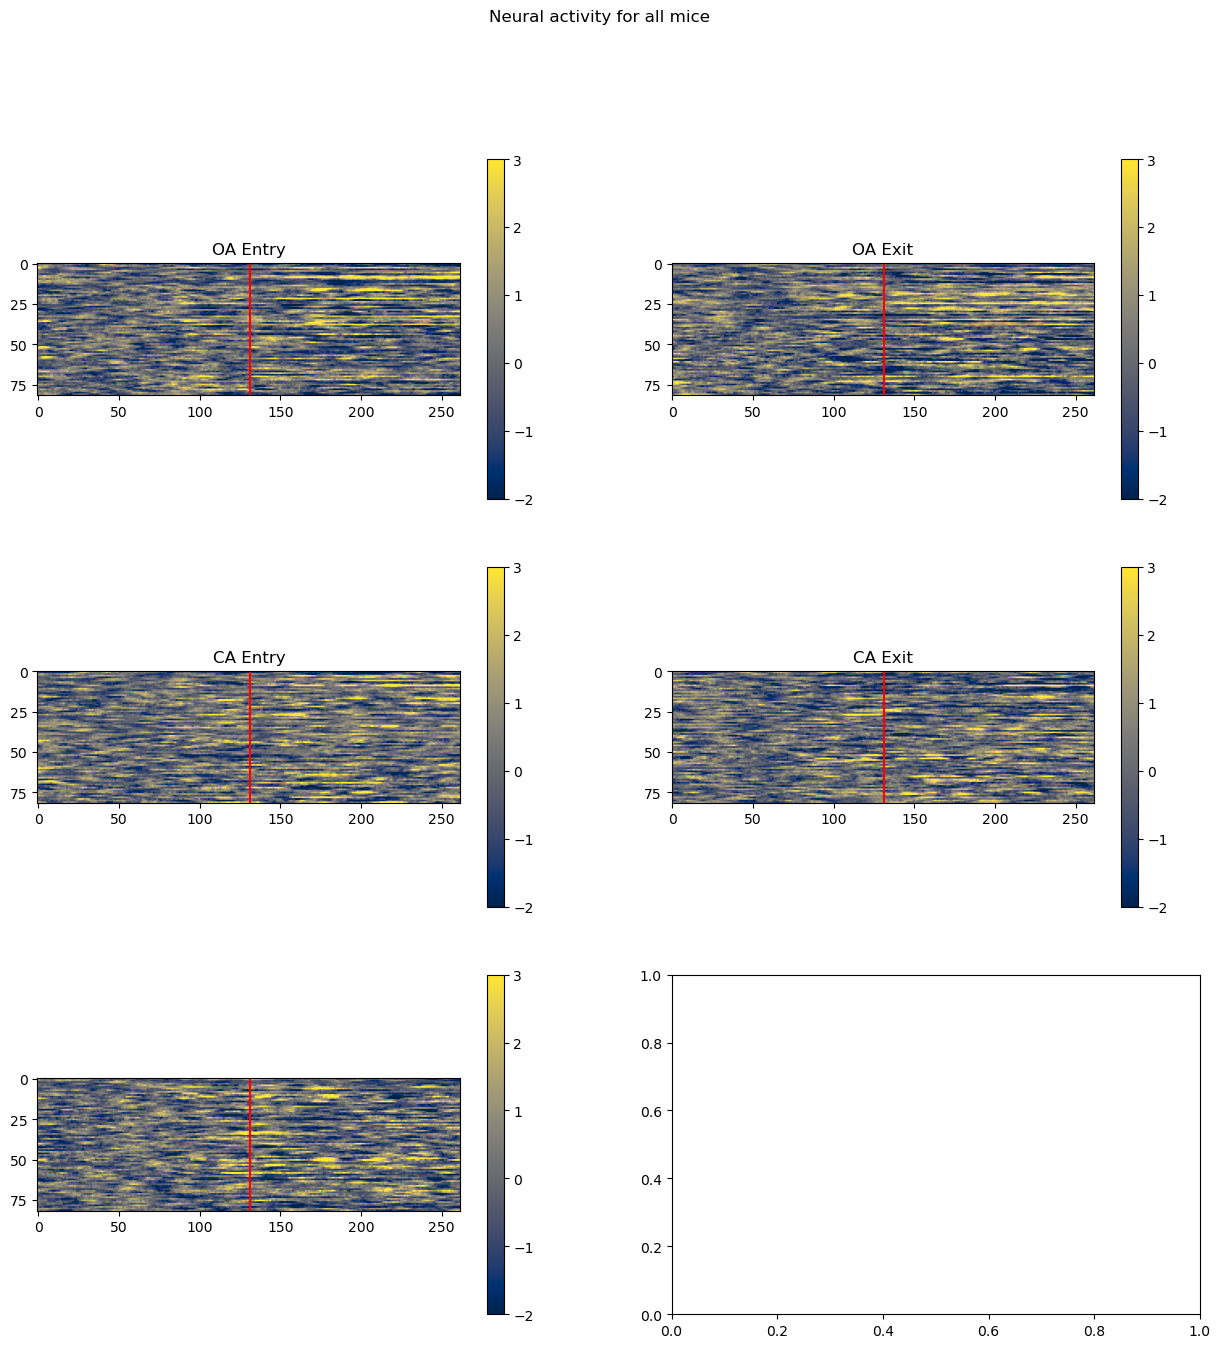

In [ ]:
%matplotlib inline
allmice_neural_avgtrials_zscored,ignoreunits = PCA_preprocessing.z_score_orderedhm(allmice_behavior_avgtrials_25_sliding.copy(), window_bin=0.025)

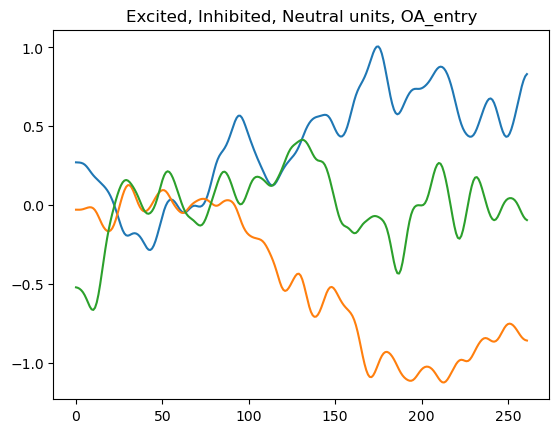

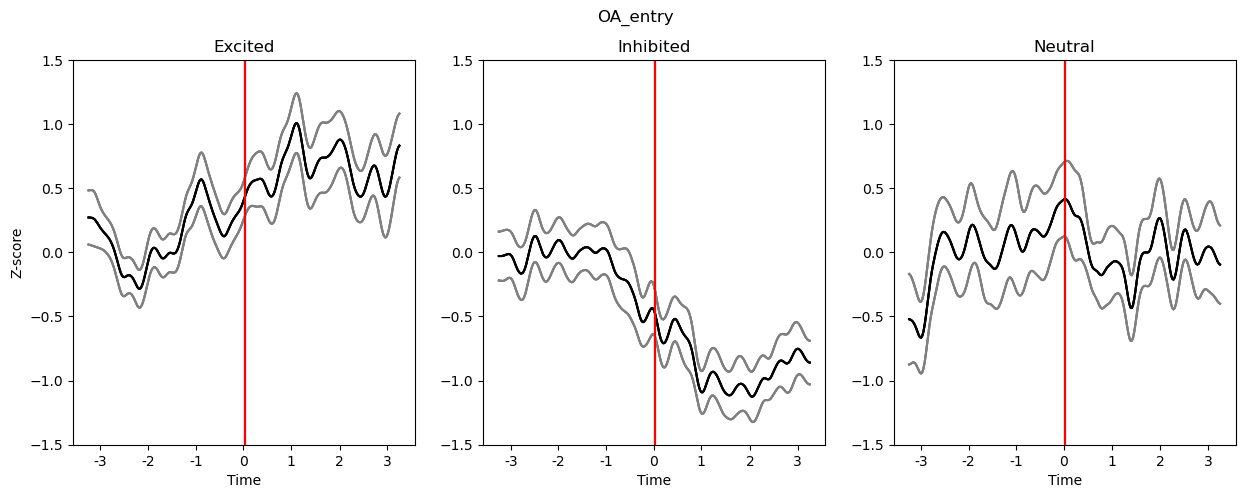

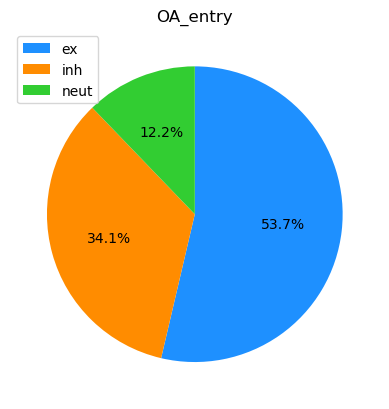

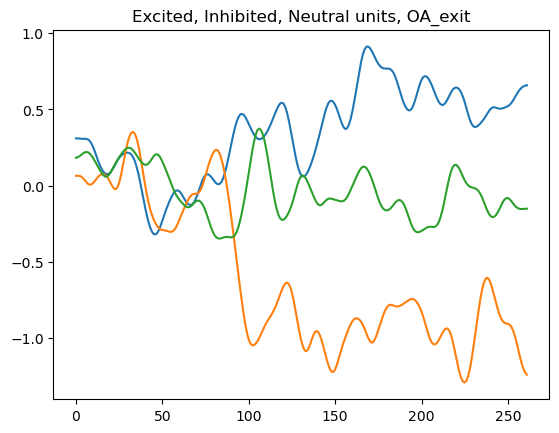

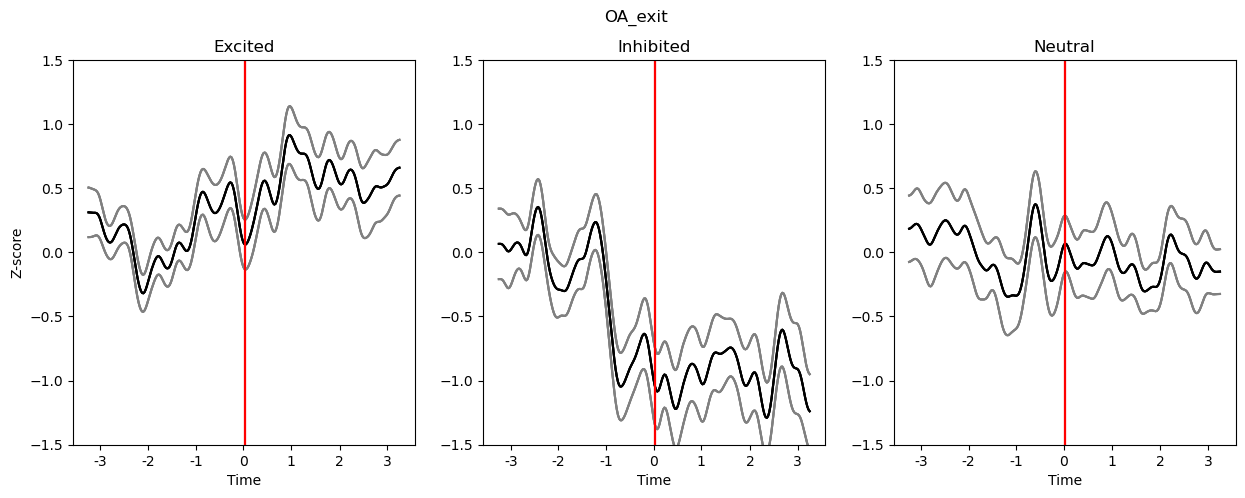

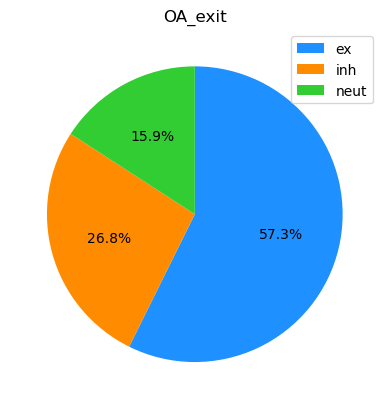

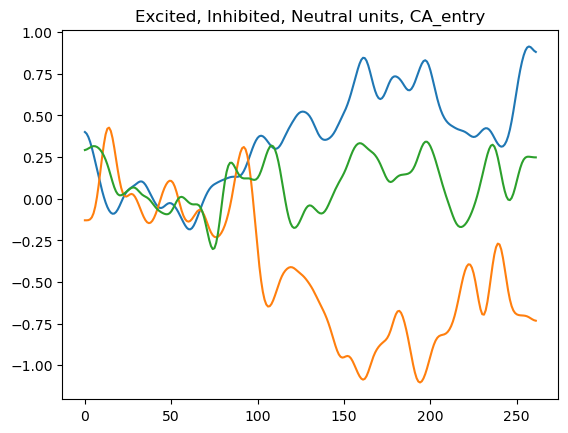

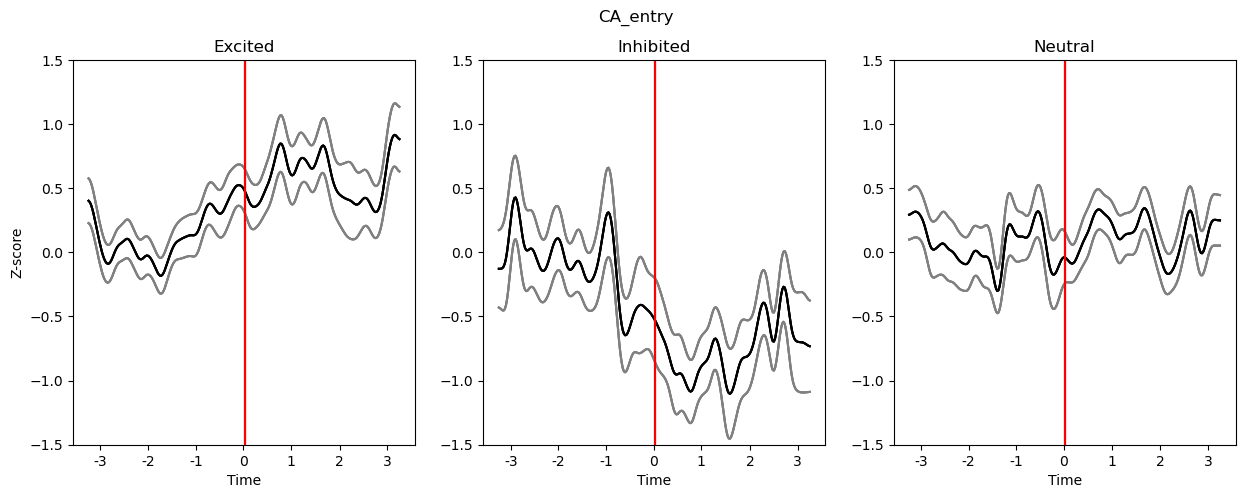

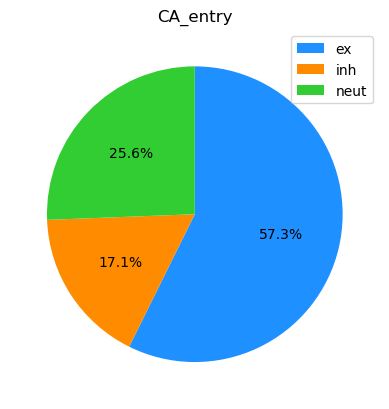

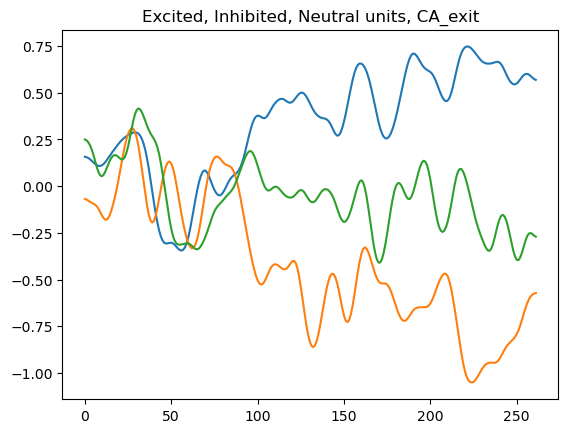

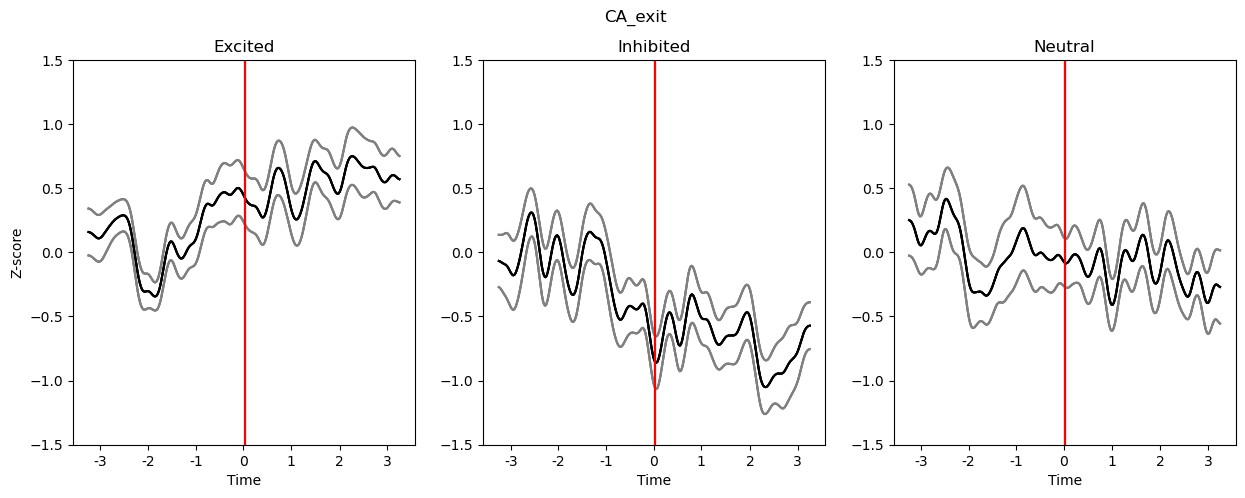

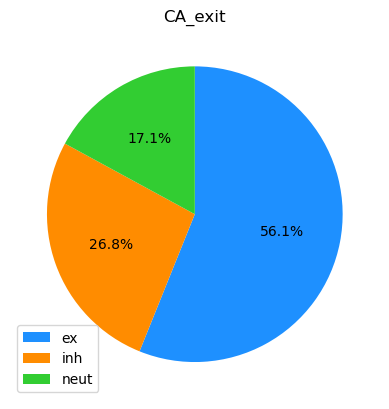

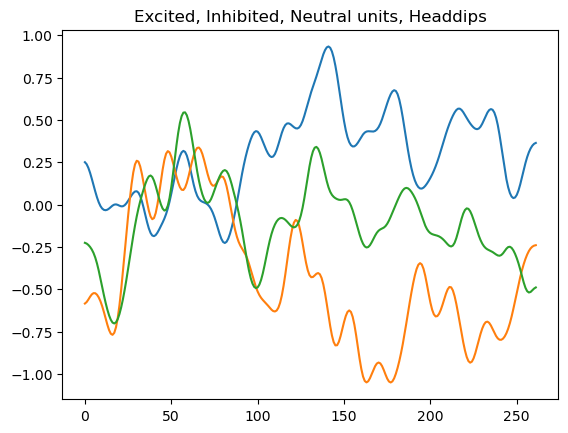

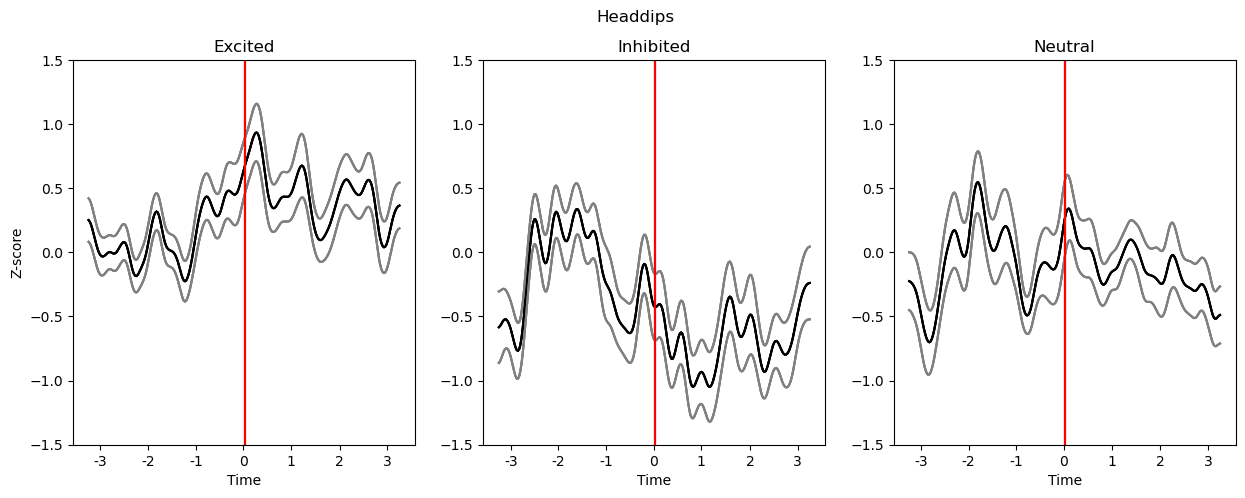

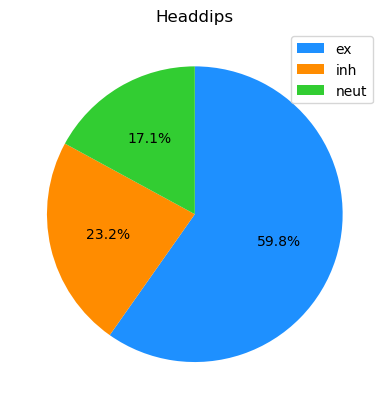

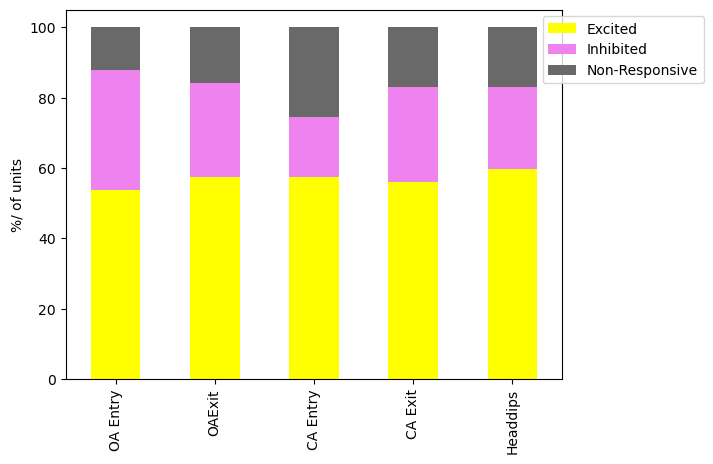

In [ ]:
%matplotlib inline
ehm = [None]*5
ihm = [None]*5
rhm = [None]*5
ehm_idx = [None]*5
ihm_idx = [None]*5
rhm_idx = [None]*5
ehm_size = [None]*5
ihm_size = [None]*5
rhm_size = [None]*5
trialtype = ["OA_entry", "OA_exit", "CA_entry", "CA_exit", "Headdips"]

for i in range(len(ehm)):
    ehm[i], ihm[i], rhm[i], ehm_idx[i], ihm_idx[i], rhm_idx[i] = PCA_preprocessing.ehm_ihm_rhm_pertrial_new(allmice_neural_avgtrials_zscored[i], trialtype[i],window_bin=0.025, savefigs=False) # actually per session
    ehm_size[i] = ehm[i].shape[0]/(ehm[i].shape[0]+ihm[i].shape[0]+rhm[i].shape[0])
    ihm_size[i] = ihm[i].shape[0]/(ehm[i].shape[0]+ihm[i].shape[0]+rhm[i].shape[0])
    rhm_size[i] = rhm[i].shape[0]/(ehm[i].shape[0]+ihm[i].shape[0]+rhm[i].shape[0])

# bar plots

df = pd.DataFrame({'Excited': np.array(ehm_size)*100,
                'Inhibited':np.array(ihm_size)*100,
                'Non-Responsive':np.array(rhm_size)*100},
                index = ['OA Entry','OAExit', 'CA Entry', 'CA Exit','Headdips']
)
colour=["yellow", "violet", "dimgrey"]
df.plot(kind='bar', stacked=True, color=colour)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.ylabel('%/ of units')
# plt.savefig('RESULTS/NOT-INJECTED/PCA_finalpicturesNew/exc_ihn_rhm_unitbarplotnums.svg')
plt.show()

In [10]:
def create_custom_tab20_tab20c_cmap():
    # Define the 'Pastel1' colormap and select the first two colors
    cmap_Set1 = plt.get_cmap('Set1') #Pastel1
    color1 = cmap_Set1(0)
    color2 = cmap_Set1(1)
    
    cmap_Pastel1 = plt.get_cmap('Pastel1') #Pastel1
    color3 = cmap_Pastel1(cmap_Pastel1.N - 1)  # THird color

    # Create a new colormap by interpolating between the two colors
    colors = [color2,color3, color1]

    n_colors = 100  # Number of gradient colors
    new_cmap = LinearSegmentedColormap.from_list('custom_tab20_tab20c', colors, N=n_colors)
    return new_cmap

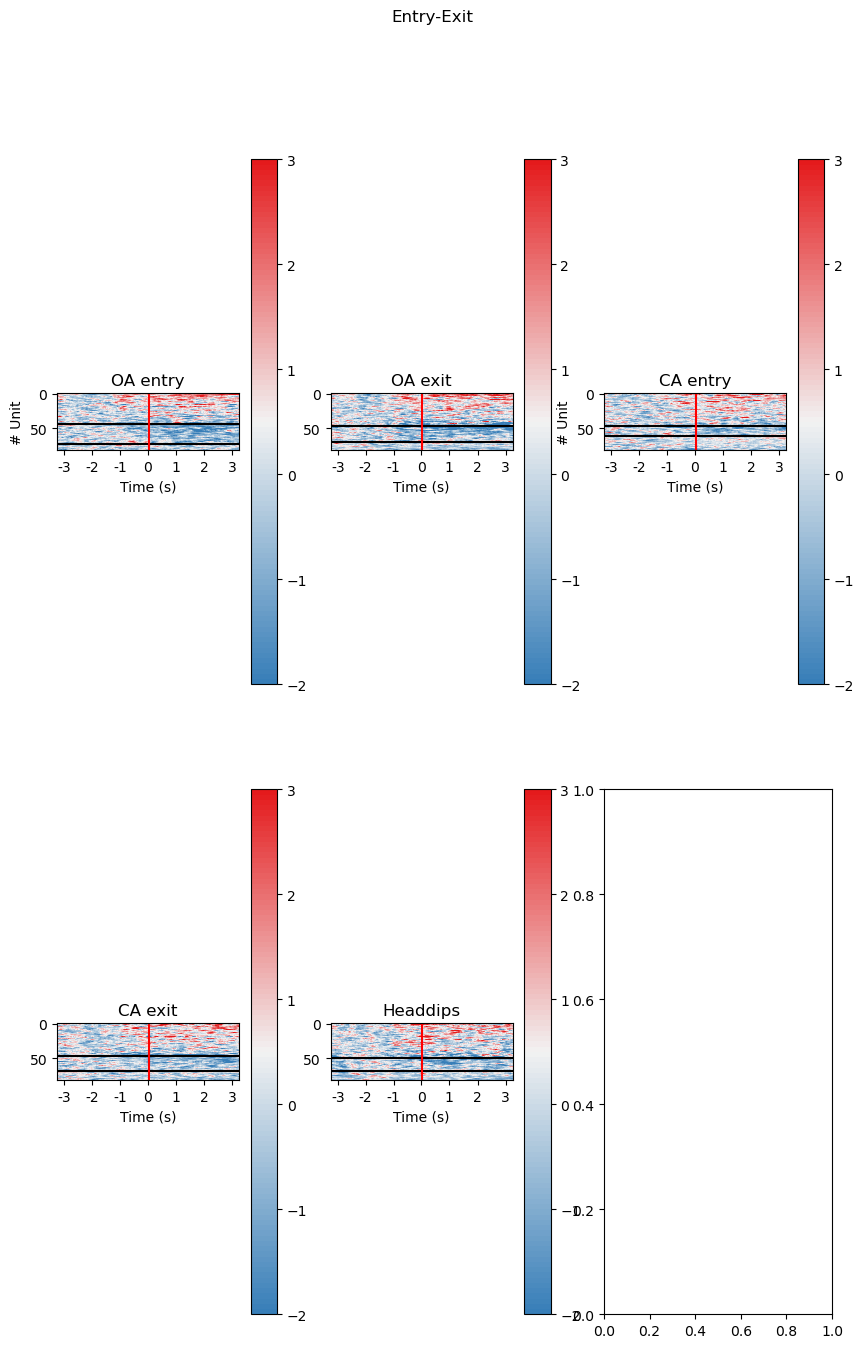

In [11]:
# Heatmap ordering 
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
custom_tab20_tab20c_cmap = create_custom_tab20_tab20c_cmap()
trialtitle = ["Entry-Exit", "Arm to Arm"]
trialsubtypes_entryexit = ["OA entry", "OA exit", "CA entry", "CA exit", "Headdips"]
trialsubtypes_8t = ["OA - OA", "CA - CA", "OA - CA", "CA - OA","Headdips"]
finalunits_entryexit = PCA_preprocessing.plotheatmap(
    ehm, ihm, rhm, trialtitle[0], trialsubtypes_entryexit, savefig=False, vmax=3, vmin=-2, cmap=custom_tab20_tab20c_cmap)

In [12]:
bigarr = np.array(allmice_neural_avgtrials_zscored[0])
for i in range(0, len(allmice_neural_avgtrials_zscored)):
    if i != 0:
        bigarr = np.hstack((bigarr,allmice_neural_avgtrials_zscored[i]))
bigarr.shape

(82, 1310)

In [13]:
excludetrials = np.concatenate((np.arange(len_trial_25,len_trial_25*2), np.arange(len_trial_25*3, len_trial_25*4)))
bigarr = np.delete(bigarr, excludetrials, axis=1)
bigarr.shape

(82, 786)

# Population Dynamics - PCA

In [14]:
l_proj_5trials, var_5trials ,pc_original = PCA_preprocessing.PCA_analysis(l_data_PCA=bigarr)

Dimension of projected data:
(786, 3)


25.0379704003396


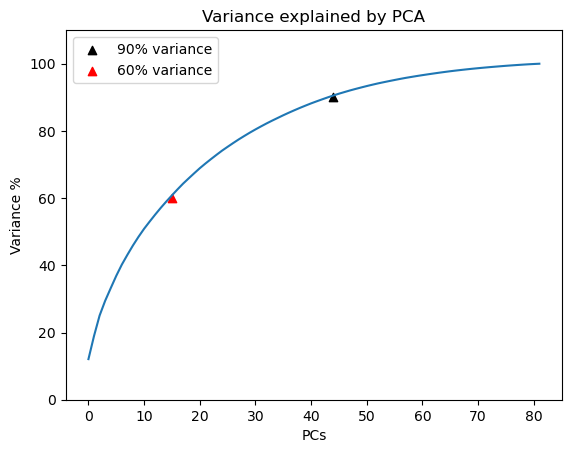

In [ ]:
%matplotlib inline
plt.plot(np.cumsum(var_5trials)*100)
pc_90perc = np.where(np.cumsum(var_5trials)>=0.9)[0][0]
pc_30perc = np.where(np.cumsum(var_5trials)>=0.3)[0][0]
pc_60perc = np.where(np.cumsum(var_5trials)>=0.6)[0][0]
print(np.sum(var_5trials[0:3])*100)
plt.scatter(pc_90perc, 90, marker='^', c='k', label='90% variance')
plt.scatter(pc_60perc, 60, marker="^", c='r', label="60% variance")
plt.xlabel('PCs')
plt.ylabel('Variance %')
plt.title('Variance explained by PCA')
plt.legend()
plt.ylim([0,110])
plt.show()

0
262
262
524
524


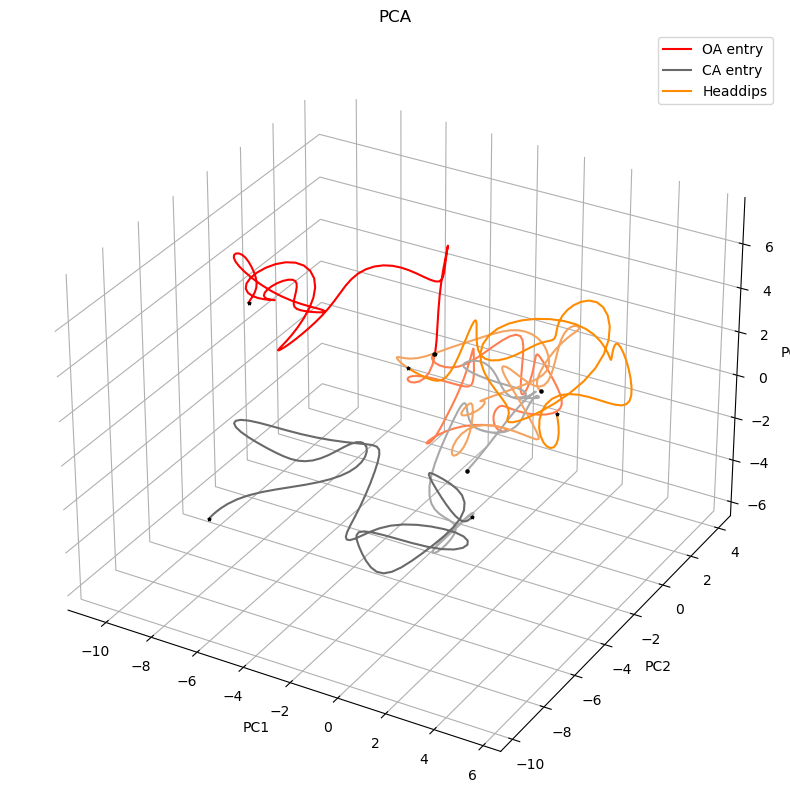

PC1(%)= 12.08473856719742
PC2(%)= 6.885342310666109
PC3(%)= 6.06788952247607


In [ ]:
c=0
%matplotlib inline
# to make plot interactive, run "%matplotlib qt" instead of "%matplotlib inline"
# ensure that your environment has the package "pyqt" installed (perferrably "pyqt5")
# save this figure manually
len_trial = len_trial_25#
c1 = len_trial # 121
colours = ['red', 'lightcoral', 'dimgrey', 'darkgrey', 'darkorange'] 
colours_lighter = ['coral', 'pink', 'darkgrey','grey', 'sandybrown']
leg = ["OA entry", "OA exit", "CA entry", "CA exit", "Headdips"]

fig = plt.figure(figsize=(10,10),facecolor='white')
ax = plt.axes(projection='3d')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

for i in range(5):#len(finalunits_entryexit)):
    sig = 3
    print(c)
    if i ==1 or i==3:
        continue
    x = gaussian_filter1d(l_proj_5trials[c:c1,0], sigma=sig)
    y = gaussian_filter1d(l_proj_5trials[c:c1,1], sigma=sig)
    z = gaussian_filter1d(l_proj_5trials[c:c1,2], sigma=sig)
    mid = int(x.size/2)
    plt.plot(x[:1+mid],y[:1+mid],z[:1+mid], c = colours_lighter[i])
    plt.plot(x[mid:],y[mid:],z[mid:], label = leg[i], c = colours[i])
    ax.scatter3D(x[0],y[0], z[0], c='k',s=5,marker="o")
    ax.scatter3D(x[mid], y[mid], z[mid], c='k',s=5,marker="*")
    ax.scatter3D(x[-1], y[-1], z[-1], c='k',s=5,marker="*")
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    c=c1
    c1 += len_trial

plt.legend()
plt.title('PCA')
# plt.savefig('outputpath.svg') 
plt.show()



print("PC1(%)=", var_5trials[0]*100)
print("PC2(%)=", var_5trials[1]*100)
print("PC3(%)=", var_5trials[2]*100)

(82, 786)
Dimension of projected data:
(786, 82)
(43, 43)
(43, 786)


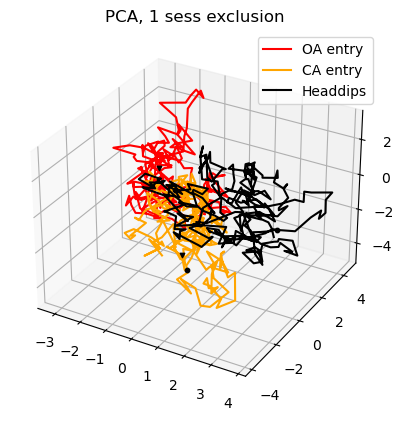

(39, 39)
(39, 786)


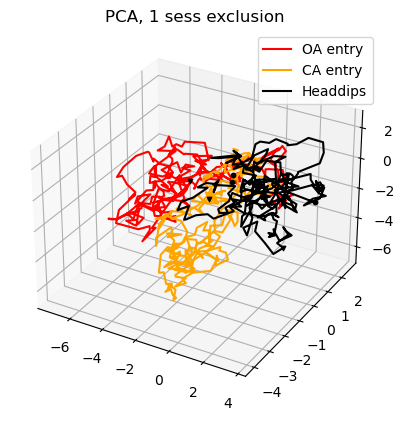

In [ ]:
%matplotlib inline
#analysis related to Leave one approach Extended Data Fig. 4m
ignoresessions = []
def project_excludeonemouse(bigarr, bigarr_excludeonemouse,unitspermouse_cumsum, finalunits_entryexit, type_trial="real"):
    vectorsTrials = [None]*5 # for each trial type
    l_traj_stats = []
    l_traj_5trials_newPCAfunct, var_5trials_newPCAfunct ,pc_original_newPCAfunct,eigvec, eigval = PCA_statstests.PCA_analysis(l_data_PCA=bigarr)

    for i in range(len(bigarr_excludeonemouse)):
        deleteeigenvalsvecs =np.arange(unitspermouse_cumsum[i],unitspermouse_cumsum[i+1])#np.arange(eigvec.shape[0]-(-unitspermouse_cumsum[i]+unitspermouse_cumsum[i+1]),eigvec.shape[0]) #
        eigvec_copy = np.copy(eigvec)
        eigenval_copy = np.copy(eigval)
        eigenvec_stats =np.delete(eigvec_copy, deleteeigenvalsvecs, axis=0) #eigvec_copy[:eigvec.shape[0]-(-unitspermouse_cumsum[i]+unitspermouse_cumsum[i+1]),:eigvec.shape[0]-(-unitspermouse_cumsum[i]+unitspermouse_cumsum[i+1])]#np.delete(eigvec_copy, deleteeigenvalsvecs, axis=0)
        
        eigval_stats = np.delete(eigenval_copy, deleteeigenvalsvecs)
        idx_argsorteigval = np.argsort(eigval_stats)[::-1]
        eigenvec_stats = eigenvec_stats[:,idx_argsorteigval]
        print(eigenvec_stats.shape)
        print(bigarr_excludeonemouse[i].shape)
        l_traj_bigsinglesess = PCA_statstests.projectdata(data_mat=bigarr_excludeonemouse[i], PC=eigenvec_stats)[:,:] #PCA_analysis(bigarr_excludeonemouse[i]) #PCA_analysis(bigarr_onlyone[i])[0] #
        l_traj_stats.append(l_traj_bigsinglesess)

        c=0
        len_trial = (finalunits_entryexit[0].shape[1]) # time
        c1 = len_trial # 121
        colours = ['red', 'green', 'orange', 'blue', "black"]
        leg = ["OA entry", "OA exit", "CA entry", "CA exit", "Headdips"]

        #fig = plt.figure(figsize=(15,15))
        ax = plt.axes(projection='3d')

        for k in range(len(finalunits_entryexit)):
            sig = 3
            #print(c)
            if k == 1 or k == 3:
                continue
            
            x =l_traj_stats[i][c:c1,0] 
            y =l_traj_stats[i][c:c1,1] 
            z =l_traj_stats[i][c:c1,2] 
            mid = int(x.size/2)
            plt.plot(x,y,z, label = leg[k], c = colours[k])
            ax.scatter3D(x[0], y[0], z[0], c='k',s=10,marker="o")
            ax.scatter3D(x[mid], y[mid], z[mid], c='k',s=10,marker="v")
         
            c=c1
            c1 += len_trial

        plt.legend()
        plt.title('PCA, 1 sess exclusion')
        # plt.savefig('RESULTS/NOT-INJECTED/PCA_finalpicturesNew/Stats_PCA_figures/PCA_allmice_allunits_EPM_definedtrials_entryexit_'+str(i)+type_trial+'.svg')
        plt.show()
    return l_traj_stats,eigvec, eigval

unitspermouse, unitspermouse_cumsum, bigarr_excludeonemouse=PCA_statstests.unitspermouse_excludeonesessgenerator(l_data, ignoreunits,excludetrials,ignoresessions, allmice_dividedtrials, allmice_neural_avgtrials_zscored)
l_traj_stats, eigvec, eigval = project_excludeonemouse(bigarr, bigarr_excludeonemouse,unitspermouse_cumsum, finalunits_entryexit)


Dimension of projected data:
(786, 43)
Dimension of projected data:
(786, 39)


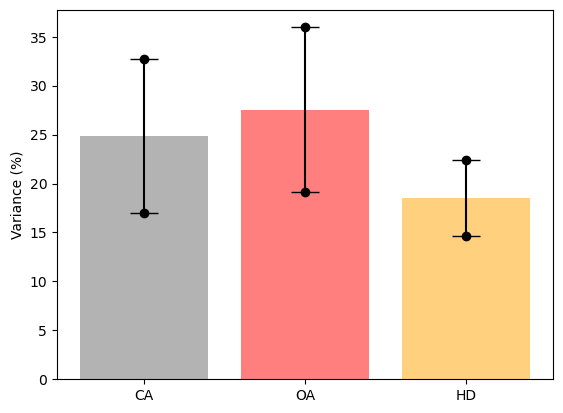

In [ ]:
#variance explained by each event type; Related to Fig 4f
oa_entry = []
ca_entry = []
hd = []

for i in range(len(bigarr_excludeonemouse)):
    traj , eigval_normalised_sh , PC = PCA_preprocessing.PCA_analysis(l_data_PCA=bigarr_excludeonemouse[i], k = 100)


    projected_oa = PCA_preprocessing.projectdata(PC, bigarr_excludeonemouse[i][:,:262])
    projected_ca = PCA_preprocessing.projectdata(PC, bigarr_excludeonemouse[i][:,262:524])
    projected_headdips = PCA_preprocessing.projectdata(PC, bigarr_excludeonemouse[i][:,524:])

    variance_oa = np.var(projected_oa, axis=0)
    variance_ca = np.var(projected_ca, axis=0)
    variance_headdips = np.var(projected_headdips, axis=0)

    explained_variance_ratio_oa = variance_oa / np.sum(variance_oa )
    explained_variance_ratio_ca = variance_ca / np.sum(variance_ca)
    explained_variance_ratio_headdips = variance_headdips / np.sum(variance_headdips)

    x = explained_variance_ratio_oa[0]*100 +explained_variance_ratio_oa[1] *100+ explained_variance_ratio_oa[2]*100 
    y = explained_variance_ratio_ca [0] * 100 +explained_variance_ratio_ca [1] * 100 + explained_variance_ratio_ca[2] * 100 
    z =  explained_variance_ratio_headdips [0] * 100 +explained_variance_ratio_headdips [1]*100 + explained_variance_ratio_headdips[2]*100 
    # print(x,y,z)

     
  
    oa_entry.append(x)
    ca_entry.append(y)
    hd.append(z)


    # Calculate mean and SEM for the accumulated data
mean_oa = np.mean(oa_entry)
mean_ca = np.mean(ca_entry)
mean_headdips = np.mean(hd)

sem_oa = sem(oa_entry)
sem_ca = sem(ca_entry)
sem_headdips = sem(hd)

# Plotting
means = [mean_ca, mean_oa, mean_headdips] 
error = [sem_ca, sem_oa, sem_headdips]   
colours = ['dimgrey', 'red','orange'] 
xlabels = ["CA", "OA", "HD"]
x_pos = np.arange(len(xlabels))

# Bar plot
plt.bar(x=x_pos, height=means, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, color=colours)
plt.xticks(x_pos, xlabels)
plt.ylabel('Variance (%)')
# plt.ylim([0, 20])

plt.scatter(np.zeros(len(ca_entry)), ca_entry, c='k')  
plt.scatter(np.ones(len(oa_entry)), oa_entry, c='k')  
plt.scatter(np.full(len(hd), 2), hd, c='k')           

plt.show()


OA entry and headdips: 0.7050584884469389
OA entry and CA entry: 0.9078465331693836
CA entry and headdips: 0.7409814313008932


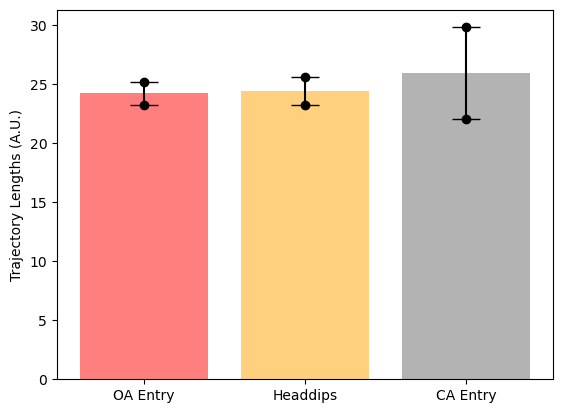

In [ ]:
# t-test among pairs
# OA Entry and headdips
# stats from l_proj_5trials_1mouse: length of each traj
%matplotlib inline

from scipy.spatial.distance import mahalanobis
from scipy.stats import ttest_ind, f_oneway

metrics,_, origin = PCA_statstests.obtain_metrics(l_traj_stats=l_traj_stats, finalunits_entryexit=allmice_neural_avgtrials_zscored, unitspermouse=unitspermouse,pc_90perc=3, metric_type="length", mid_select=True)
_,pval = ttest_ind(metrics[0][:,:1].squeeze(), metrics[-1][:,:1].squeeze())
print("OA entry and headdips: "+str(pval))
_,pval = ttest_ind(metrics[0][:,:1].squeeze(), metrics[1][:,:1].squeeze())
print("OA entry and CA entry: "+str(pval))
_,pval = ttest_ind(metrics[1][:,:1].squeeze(), metrics[-1][:,:1].squeeze())
print("CA entry and headdips: "+str(pval))

# Unit Number Tree

In [ ]:
#Related to Fig. 4c  
idx_consider = np.array([0,2,4])
commonunits_all = np.zeros((3,3,3))
commonunits_all_idx = []
allunits = [ehm_idx,ihm_idx, rhm_idx]
label = []
trialtype =["OA", "CA", "HD"]
unittypestr = ["e", "i", "n"]

for i in range(3):
    for j in range(3):
        for k in range(3):
            x = np.intersect1d(allunits[i][0], allunits[j][4])
            commonunits_all[i,j,k] = len(np.intersect1d(x, allunits[k][2]))*100/695#len(np.union1d(allunits[i][0], allunits[i][2], allunits[i][1]))
            commonunits_all_idx.append(np.intersect1d(x, allunits[k][2]))
            label.append(trialtype[0]+unittypestr[i]+"/"+trialtype[1]+unittypestr[j]+"/"+trialtype[2]+unittypestr[k])

82


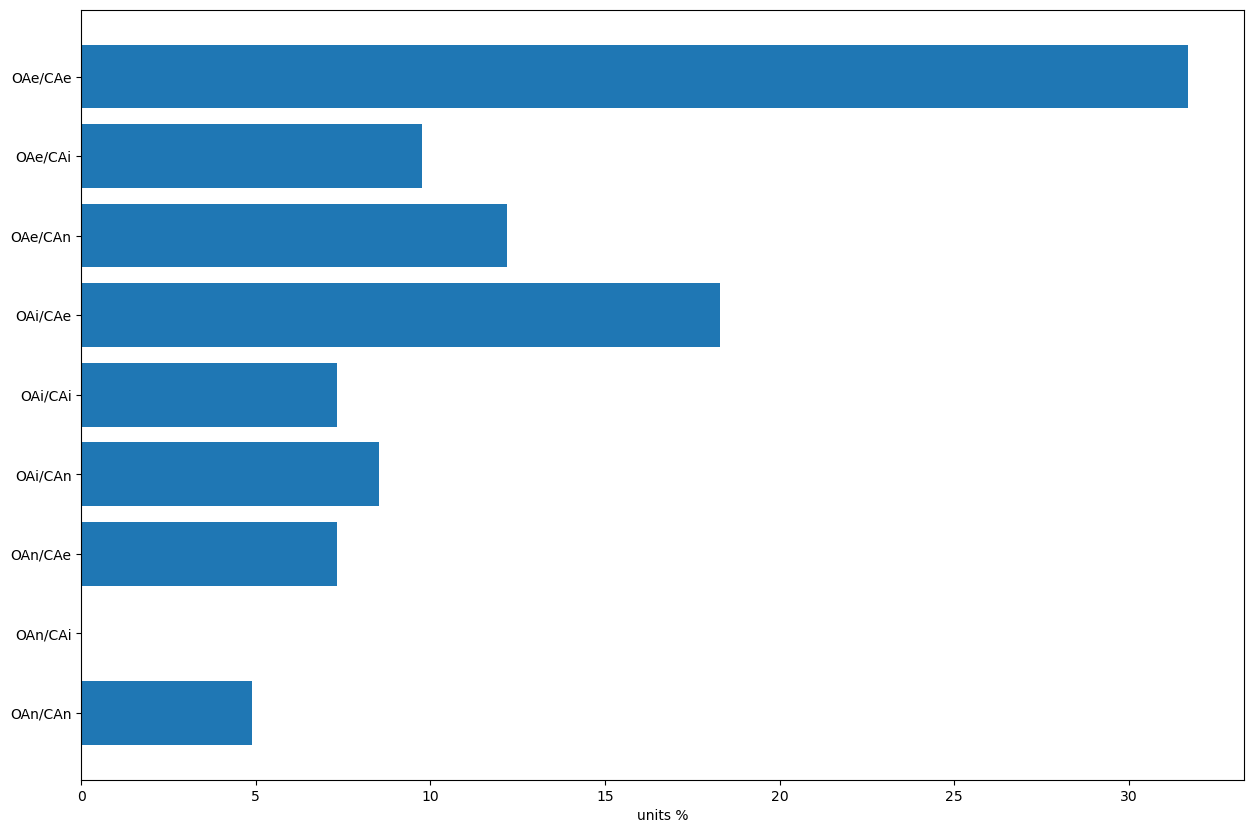

In [ ]:
idx_consider = np.array([0,2])
commonunits_all = np.zeros((3,3))
allunits = [ehm_idx,ihm_idx, rhm_idx]
label = []
trialtype =["OA", "CA"]
unittypestr = ["e", "i", "n"]
x1 = np.union1d(allunits[0][0], allunits[0][2])
x2 = np.union1d(allunits[1][0], x1)
x3 = np.union1d(allunits[1][2], x2)
x4 = np.union1d(allunits[2][0], x3)
x5 = np.union1d(allunits[2][2], x4)
oaca_unitnum = len(x5)
print(oaca_unitnum)

for i in range(3):
    for j in range(3):
        x = np.intersect1d(allunits[i][0], allunits[j][2])
        commonunits_all[i,j] = len(x)*100/oaca_unitnum
        label.append(trialtype[0]+unittypestr[i]+"/"+trialtype[1]+unittypestr[j])

plt.figure(figsize=(15,10))
plt.barh(y=np.flip(np.array(label)), width=np.flip(commonunits_all.flatten()))
plt.xlabel("units %")
plt.show()

shuffle

In [21]:
def binshuffle_250ms_allunits(l_data):
    np.random.seed(42)
    l_data_new = [None]*len(l_data)
    for i in range(len(l_data)):
        l_data_new[i]=np.zeros(l_data[i].shape)
        for j in range(l_data[i].shape[0]):
            l_data_new[i][j,:] = np.sum(np.array(l_data[i][j:j+5,:]), axis=0)
    
    l_data_sh = []
    for i in range(len(l_data)):
        neural = np.array(l_data_new[i])
        summ = np.sum(neural)
        timep = l_data_new[i].shape[0]
        freq = 30000
        #t_ignore = int(30*0.05*30000)
        timeb_total = int(timep*freq*0.025) #- t_ignore
        y = np.zeros((timeb_total, neural.shape[-1]))
        for i in range(neural.shape[-1]):
            summ = np.sum(neural[:,i])
            t = (timeb_total)
            y[:,i] = np.random.binomial(n=1, p=summ/t, size=(timeb_total))
        new= np.zeros((neural.shape[0]-30+1, neural.shape[-1]))
        c=int(30000*0.025)
        print(new.shape)
        for i in range(new.shape[0]):
            new[i,:] =np.sum(y[i*c:(i+1)*c,:], axis=0)
        l_data_sh.append(new)

    return l_data_sh

In [22]:
l_data_250ms_sh_allunits = binshuffle_250ms_allunits(l_data_25)

(36425, 39)
(40635, 43)


100
trials retained: 100.0
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(272, 39)
(27

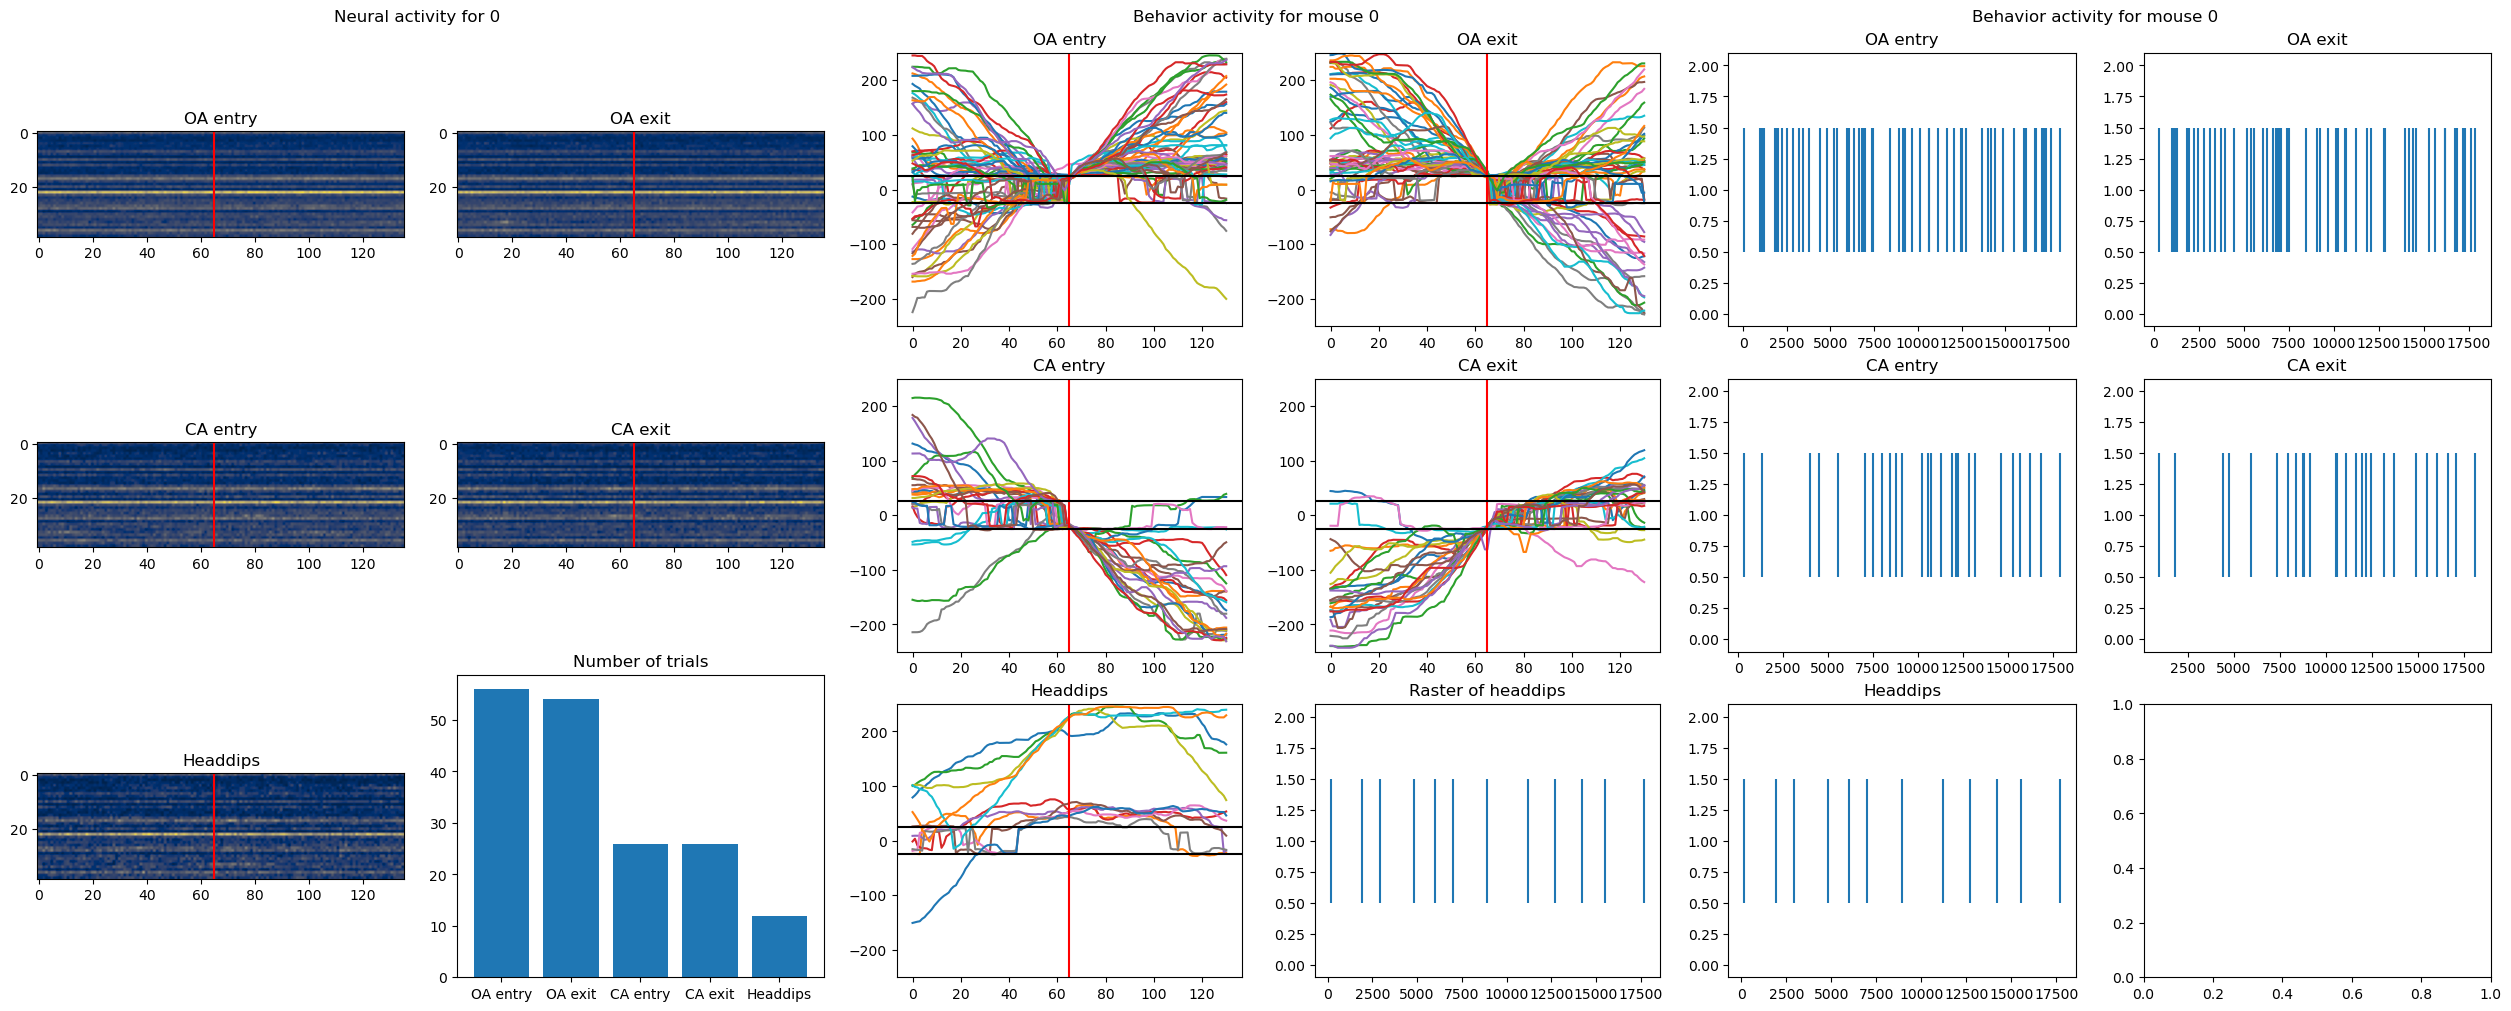

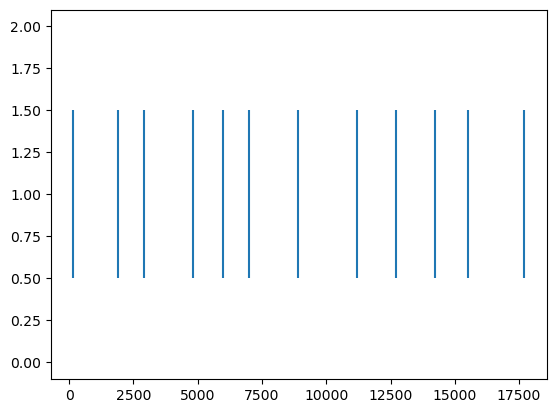

0
trials retained: 97.61904761904762
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(272, 43)
(27

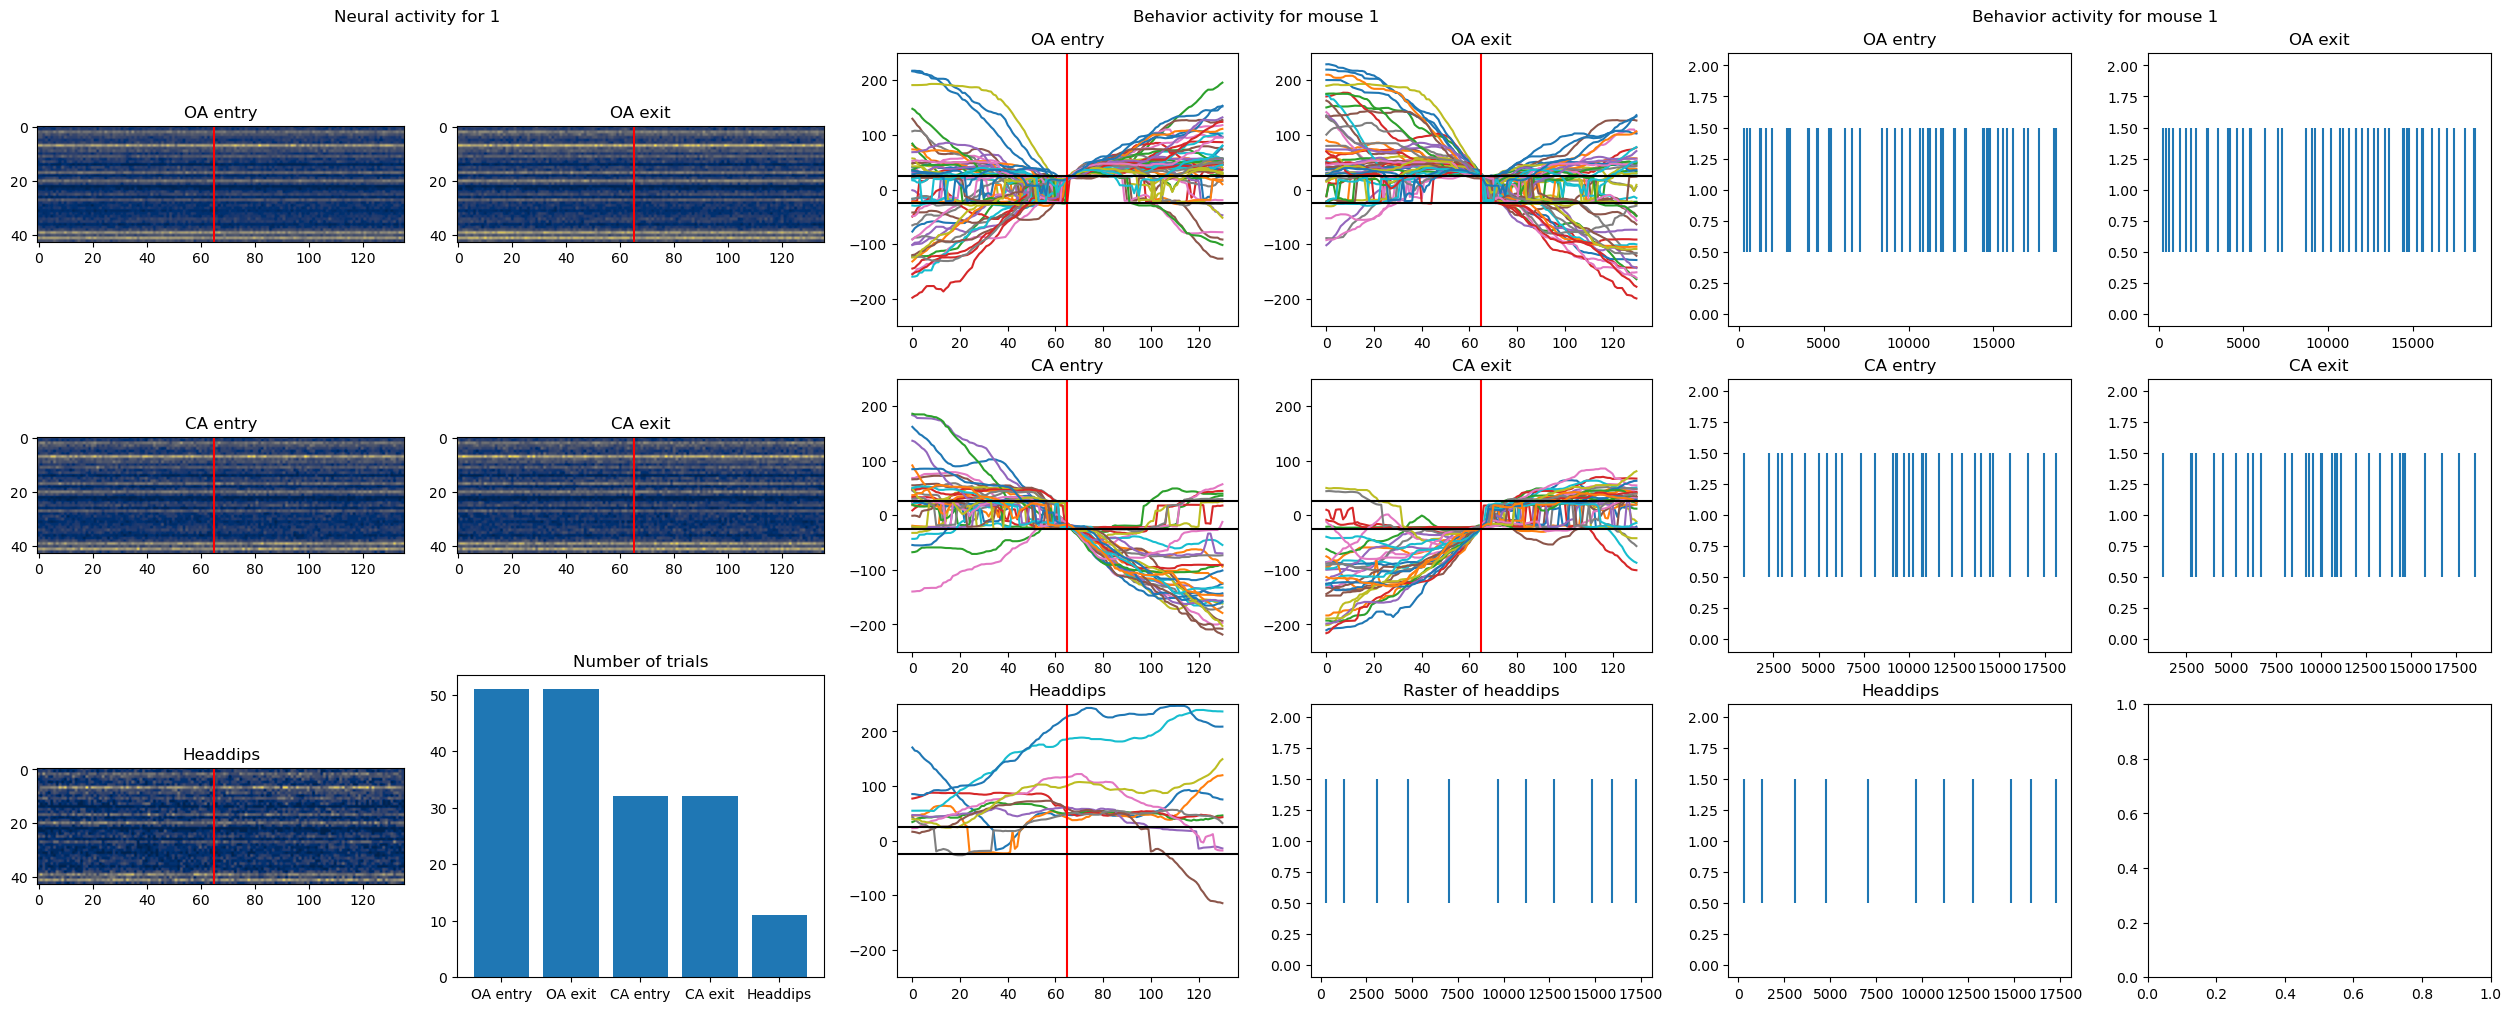

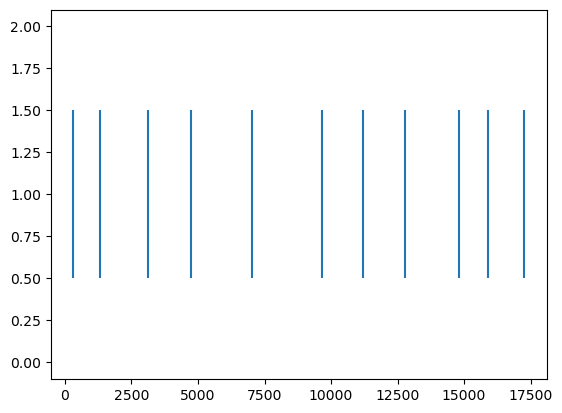

0
(82,)


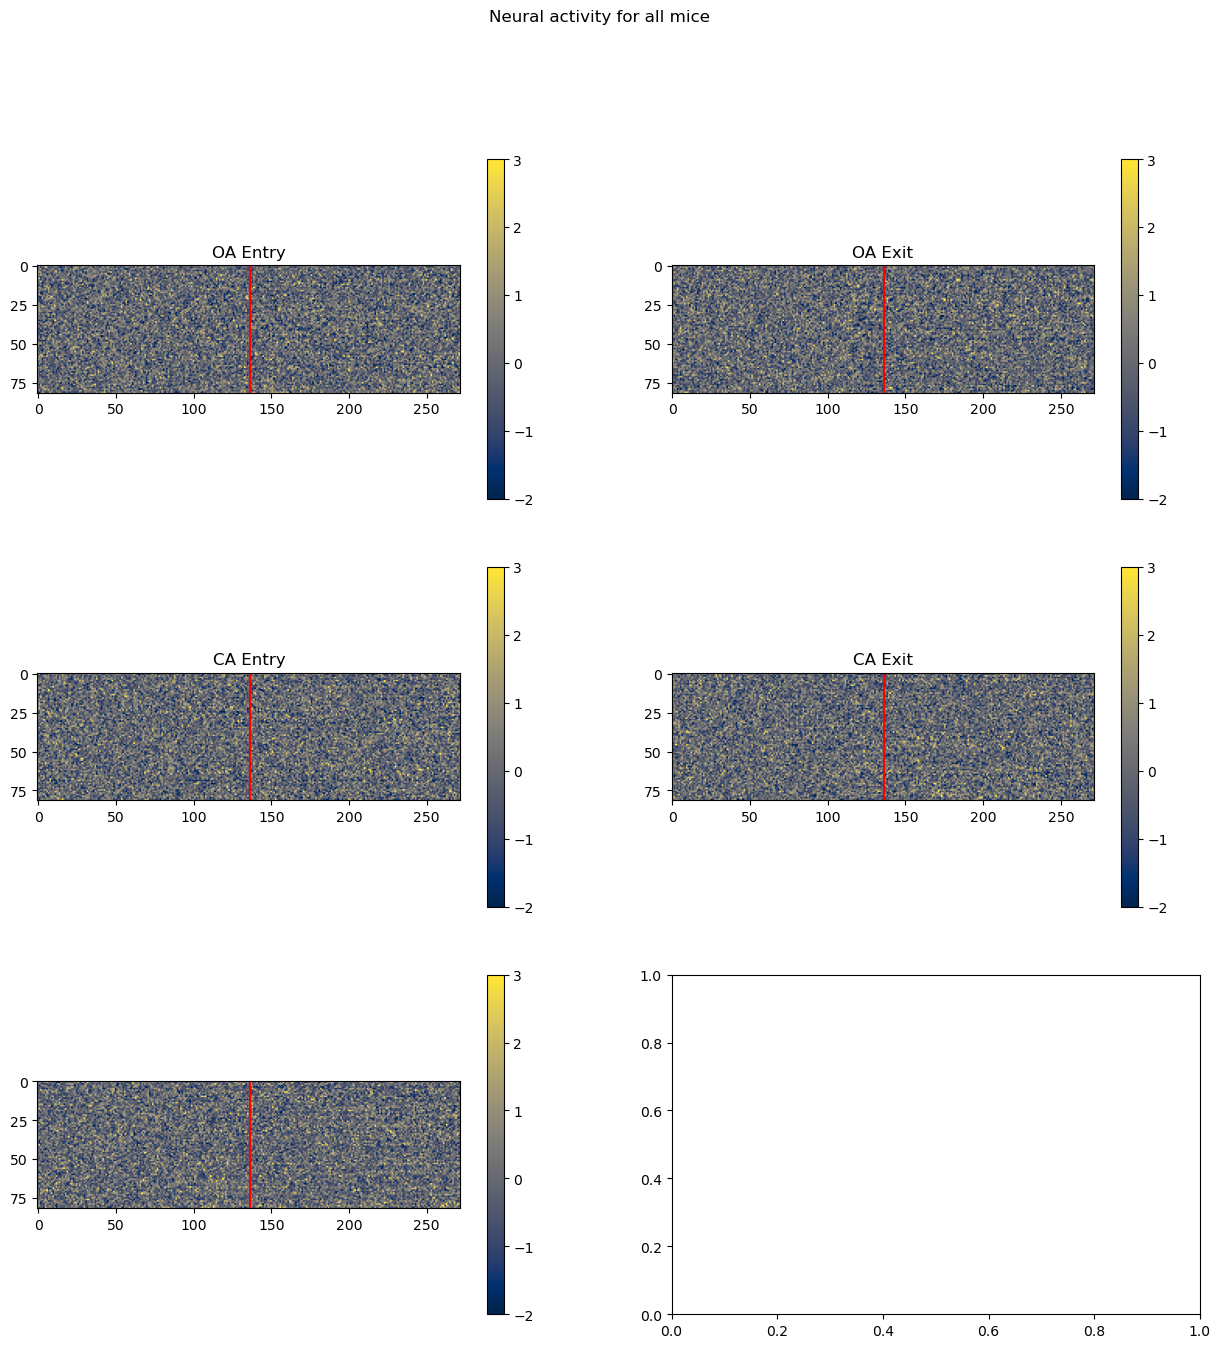

Dimension of projected data:
(1098, 3)


In [ ]:
# generate random sh data 
%matplotlib inline
notignoredsess = [0,1,2,3,4,5,6,7,8,9,10,11,12]
l_proj_5trials_sh, allmice_neural_avgtrials_sh_zscored, allmice_dividedtrials_sh, bigarr_sh, ignoreunits_sh, variance_sh = PCA_statstests.newshufflepcagenerateperdataset(100, l_mouse_name,finalunits_entryexit,allmice_dividedtrials,allmice_dividedtrials_beh,l_data, l_data_250ms_sh_allunits, l_beh_lowdim_cont,notignoredsessions = [0,1,2,3,4,5,6,7,8,9,10])

0
262
262
524
524


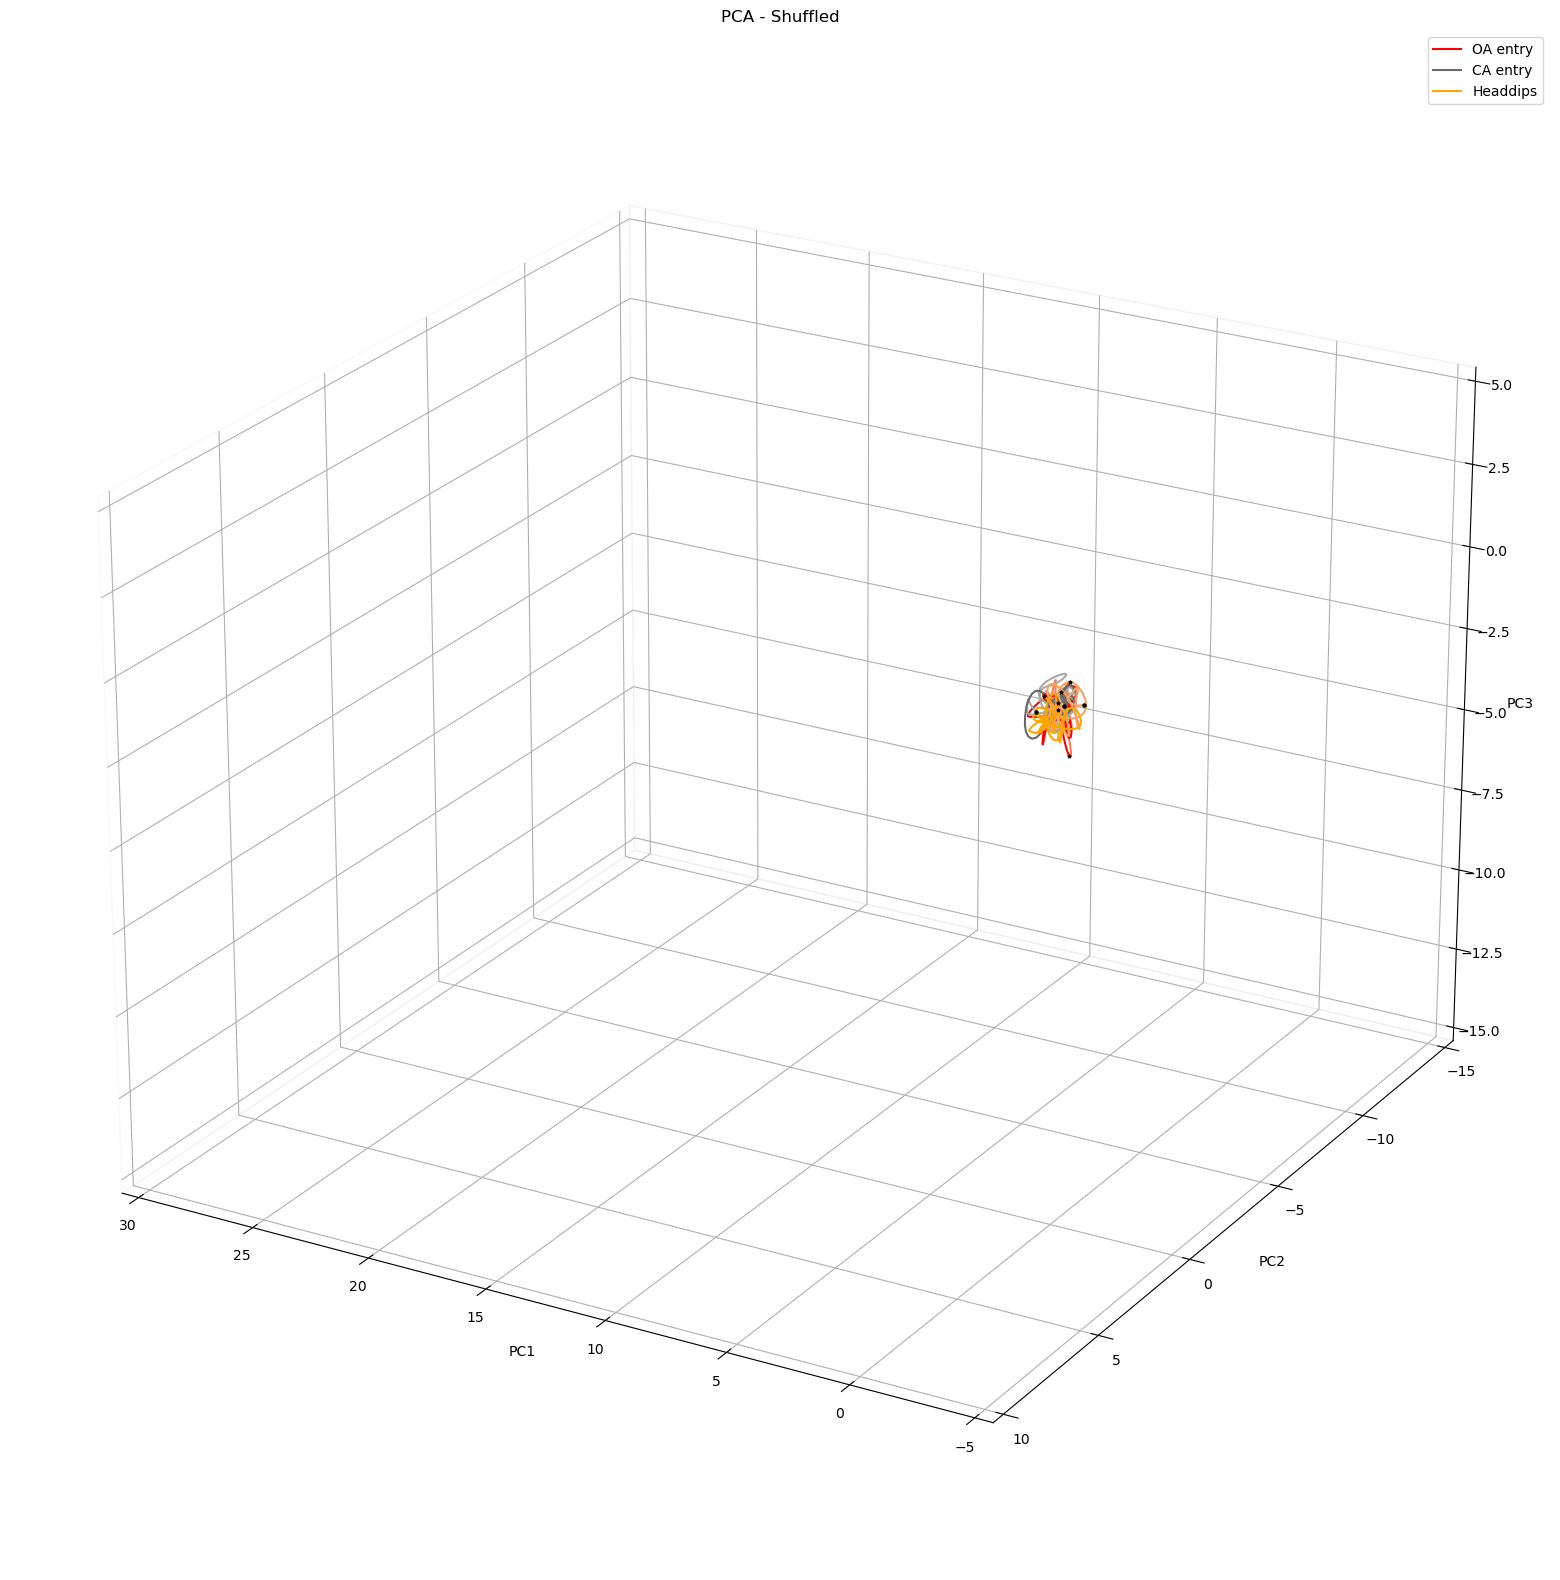

In [24]:
c=0
%matplotlib inline
len_trial = (finalunits_entryexit[0].shape[1]) # time
c1 = len_trial # 121
colours = ['red', 'lightcoral', 'dimgrey', 'darkgrey', 'orange'] #['red', 'orange','green', 'blue', "black"]
leg = ["OA entry", "OA exit", "CA entry", "CA exit", "Headdips"]

fig = plt.figure(figsize=(20,20),facecolor='white')
ax = plt.axes(projection='3d')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

for i in range(len(finalunits_entryexit)):
    sig = 3
    print(c)
    if i == 1 or i == 3:

        continue
    
    x = gaussian_filter1d(l_proj_5trials_sh[c:c1,0], sigma=sig)
    y = gaussian_filter1d(l_proj_5trials_sh[c:c1,1], sigma=sig)
    z = gaussian_filter1d(l_proj_5trials_sh[c:c1,2], sigma=sig)
    mid = int(x.size/2)
    plt.plot(y[:mid+1],x[:mid+1],z[:mid+1], c = colours_lighter[i])
    plt.plot(y[mid:],x[mid:],z[mid:], label = leg[i], c = colours[i])
    ax.scatter3D( y[0],x[0], z[0], c='k',s=5,marker="o")
    ax.scatter3D( y[mid],x[mid], z[mid], c='k',s=5,marker="*")
    ax.scatter3D( y[-1],x[-1], z[-1], c='k',s=5,marker="*")
    ax.set_ylim([-15,10])
    ax.set_zlim([-15,5])
    ax.set_xlim([-5,30])
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.view_init(23, 120)
    c=c1
    c1 += len_trial

plt.legend()
plt.title('PCA - Shuffled')
# plt.savefig('RESULTS/NOT-INJECTED/PCA_finalpicturesNew/PCA_allmice_allunits_EPM_definedtrials_sh_1dataset_20240707.svg') 
plt.show()

In [25]:
c=0
%matplotlib qt
len_trial = (finalunits_entryexit[0].shape[1]) # time
c1 = len_trial # 121
colours = ['red', 'lightcoral', 'dimgrey', 'darkgrey', 'orange'] #['red', 'orange','green', 'blue', "black"]
leg = ["OA entry", "OA exit", "CA entry", "CA exit", "Headdips"]

fig = plt.figure(figsize=(10,10),facecolor='white')
ax = plt.axes(projection='3d')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
for i in range(len(finalunits_entryexit)):
    sig = 3
    print(c)
    if i == 1 or i == 3:
        # c=c1
        # c1=c1+len_trial

        continue
    
    x = gaussian_filter1d(l_proj_5trials[c:c1,0], sigma=sig)
    y = gaussian_filter1d(l_proj_5trials[c:c1,1], sigma=sig)
    z = gaussian_filter1d(l_proj_5trials[c:c1,2], sigma=sig)
    mid = int(x.size/2)
    plt.plot(y[:mid+1],x[:mid+1],z[:mid+1], c = colours_lighter[i])
    plt.plot(y[mid:],x[mid:],z[mid:], label = leg[i], c = colours[i])
    ax.scatter3D( y[0],x[0], z[0], c='k',s=5,marker="o")
    ax.scatter3D( y[mid],x[mid], z[mid], c='k',s=5,marker="*")
    ax.scatter3D( y[-1],x[-1], z[-1], c='k',s=5,marker="*")

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')

    c=c1
    c1 += len_trial

c=0
c1 = len_trial

for i in range(len(finalunits_entryexit)):
    sig = 3
    print(c)
    if i == 1 or i == 3:
        # c=c1
        # c1=c1+len_trial

        continue
    
    x = gaussian_filter1d(l_proj_5trials_sh[c:c1,0], sigma=sig)
    y = gaussian_filter1d(l_proj_5trials_sh[c:c1,1], sigma=sig)
    z = gaussian_filter1d(l_proj_5trials_sh[c:c1,2], sigma=sig)
    mid = int(x.size/2)
    plt.plot(y[:mid+1],x[:mid+1],z[:mid+1], c = colours_lighter[i])
    plt.plot(y[mid:],x[mid:],z[mid:], label = leg[i], c = colours[i])
    ax.scatter3D( y[0],x[0], z[0], c='k',s=5,marker="o")
    ax.scatter3D( y[mid],x[mid], z[mid], c='k',s=5,marker="*")
    ax.scatter3D( y[-1],x[-1], z[-1], c='k',s=5,marker="*")
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    c=c1
    c1 += len_trial

plt.legend()
plt.title('PCA - Shuffled')
# plt.savefig('RESULTS/NOT-INJECTED/PCA_finalpicturesNew/PCA_allmice_allunits_EPM_definedtrials_together.svg') 
plt.show()

0
262
262
524
524
0
262
262
524
524


(82, 1098)
Dimension of projected data:
(1098, 82)
(43, 43)
(43, 836)


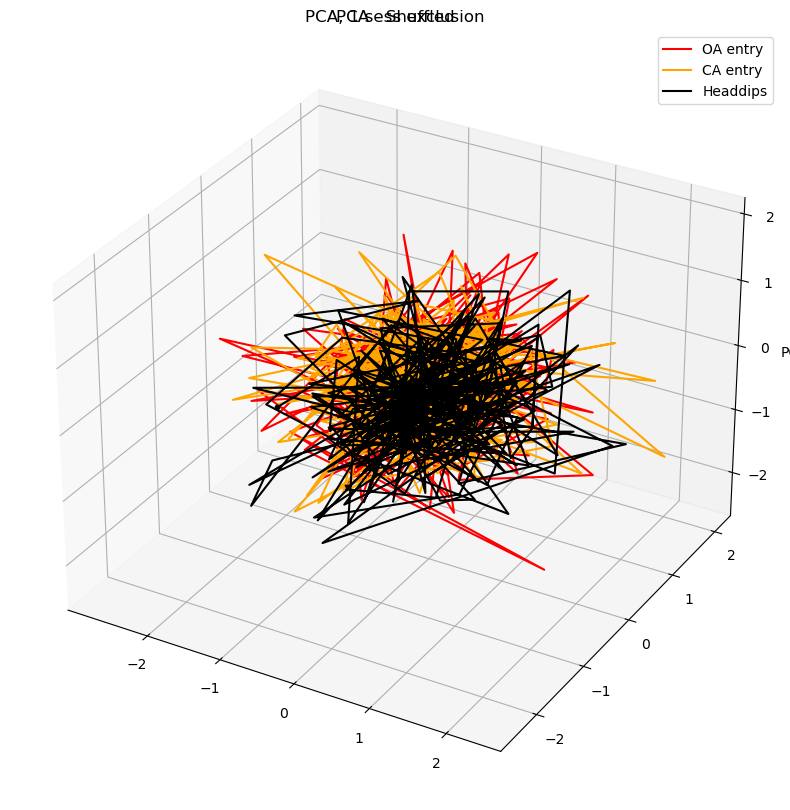

(39, 39)
(39, 836)


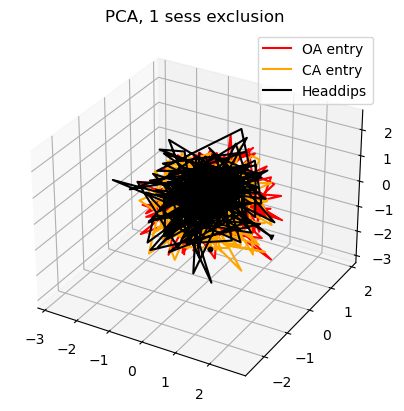

In [27]:
unitspermouse_sh, unitspermouse_cumsum_sh, bigarr_excludeonemouse_sh=PCA_statstests.unitspermouse_excludeonesessgenerator(l_data, ignoreunits_sh,excludetrials,ignoresessions, allmice_dividedtrials_sh, allmice_neural_avgtrials_sh_zscored)
l_traj_stats_sh, eigvec_sh, eigval_sh = project_excludeonemouse(bigarr_sh, bigarr_excludeonemouse_sh,unitspermouse_cumsum_sh, finalunits_entryexit,type_trial="sh")

Dimension of projected data:
(836, 43)
Dimension of projected data:
(836, 39)


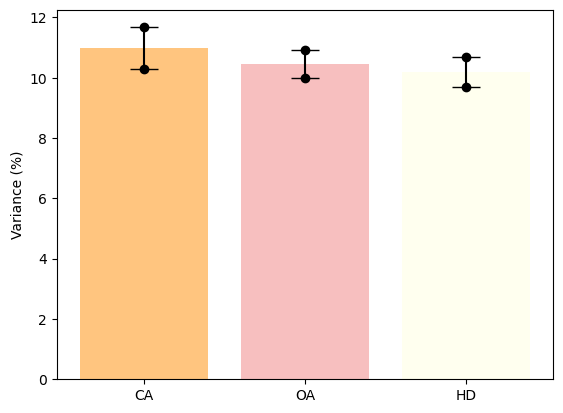

In [ ]:

oa_entry = []
ca_entry = []
hd = []

for i in range(len(bigarr_excludeonemouse_sh)):
    traj , eigval_normalised_sh , PC = PCA_preprocessing.PCA_analysis(l_data_PCA=bigarr_excludeonemouse_sh[i], k = 100)


    projected_oa = PCA_preprocessing.projectdata(PC, bigarr_excludeonemouse_sh[i][:,:262])
    projected_ca = PCA_preprocessing.projectdata(PC, bigarr_excludeonemouse_sh[i][:,262:524])
    projected_headdips = PCA_preprocessing.projectdata(PC, bigarr_excludeonemouse_sh[i][:,524:])

    variance_oa = np.var(projected_oa, axis=0)
    variance_ca = np.var(projected_ca, axis=0)
    variance_headdips = np.var(projected_headdips, axis=0)

    SUM =  np.sum(variance_oa )

    explained_variance_ratio_oa = variance_oa / SUM 
    explained_variance_ratio_ca = variance_ca / np.sum(variance_ca)
    explained_variance_ratio_headdips = variance_headdips / np.sum(variance_headdips)


    x = explained_variance_ratio_oa[0]*100 +explained_variance_ratio_oa[1] *100+ explained_variance_ratio_oa[2]*100 
    y = explained_variance_ratio_ca [0] * 100 +explained_variance_ratio_ca [1] * 100 + explained_variance_ratio_ca[2] * 100 
    z =  explained_variance_ratio_headdips [0] * 100 +explained_variance_ratio_headdips [1] * 100 +explained_variance_ratio_headdips[2] * 100
    oa_entry.append(x)
    ca_entry.append(y)
    hd.append(z)


   
mean_oa = np.mean(oa_entry)
mean_ca = np.mean(ca_entry)
mean_headdips = np.mean(hd)

sem_oa = sem(oa_entry)
sem_ca = sem(ca_entry)
sem_headdips = sem(hd)

means = [mean_ca, mean_oa, mean_headdips]  
error = [sem_ca, sem_oa, sem_headdips]    
colours = ['dimgrey', 'red','orange'] 
xlabels = ["CA", "OA", "HD"]
x_pos = np.arange(len(xlabels))

# Bar plot
plt.bar(x=x_pos, height=means, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, color=colours)
plt.xticks(x_pos, xlabels)
plt.ylabel('Variance (%)')
# plt.ylim([0, 20])
plt.scatter(np.zeros(len(ca_entry)), ca_entry, c='k') 
plt.scatter(np.ones(len(oa_entry)), oa_entry, c='k')  
plt.scatter(np.full(len(hd), 2), hd, c='k')           

plt.show()


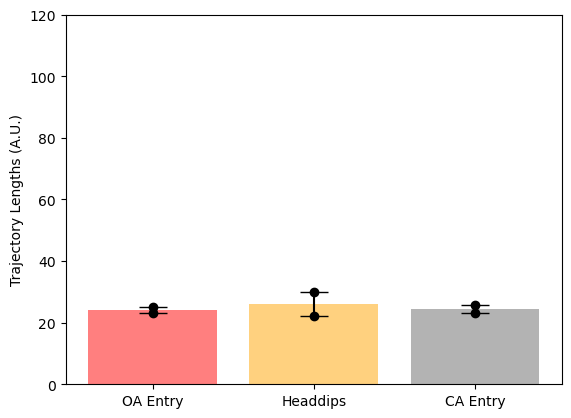

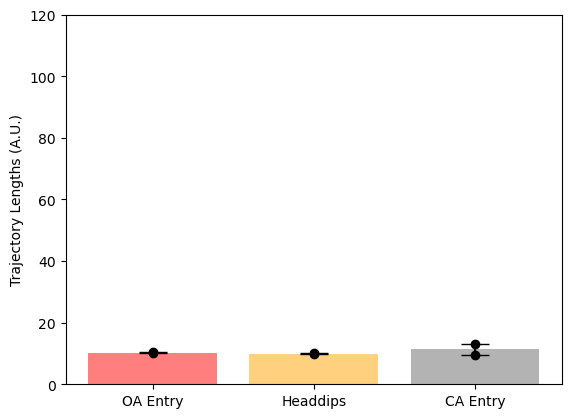

In [ ]:
#Related to Fig. 4e
%matplotlib inline
metrics,_, origin = PCA_statstests.obtain_metrics(l_traj_stats=l_traj_stats, finalunits_entryexit=allmice_neural_avgtrials_zscored, unitspermouse=unitspermouse,pc_90perc=3, metric_type="length", mid_select=True)
plt.ylim([0,60])
# plt.savefig("RESULTS/NOT-INJECTED/PCA_finalpicturesNew/PCA_EPM_Definedtrials_entryexit_statistics_length.svg")
plt.show()

metrics_sh,_,_ = PCA_statstests.obtain_metrics(l_traj_stats=l_traj_stats_sh, finalunits_entryexit=allmice_neural_avgtrials_zscored, unitspermouse=unitspermouse, metric_type="length", pc_90perc=3, mid_select=True)#pc_90perc_sh)
plt.ylim([0,60])

plt.show()

DECODER: Related to SVM decoding Fig. 4g

In [ ]:
allmice_trials_25_dec,allmice_trials_25_dec_sh = [None]*len(allmice_dividedtrials_25),[None]*len(allmice_dividedtrials_25)
for i in range(len(allmice_dividedtrials_25)):
    allmice_trials_25_dec[i]=[None]*(len(allmice_dividedtrials_25[i])-1)
    allmice_trials_25_dec_sh[i]=[None]*(len(allmice_dividedtrials_25[i])-1)
    for j in range(len(allmice_dividedtrials_25[i])-1): # removing the last mouse coz of low no. of headdips
        allmice_trials_25_dec[i][j] = allmice_dividedtrials_25[i][j]
        allmice_trials_25_dec_sh[i][j] = allmice_dividedtrials_sh[i][j]


In [ ]:
def dataset_generator_decoder(allmice_dividedtrials, unitspermouse_cumsum,eigvec, eigval, units):
    
    allmice_neural_sliding = [None]*len(allmice_dividedtrials) # 5
    if allmice_dividedtrials[0][0].shape[1]>200:
        len_trial = allmice_dividedtrials[0][0].shape[1]-10
        window = 10
        window_bin = 0.025
    else:
        len_trial = allmice_dividedtrials[0][0].shape[1]-5
        window = 5
        window_bin = 0.05
    removeunitspertrial = [None]*len(allmice_dividedtrials)
    trials_final = [None]*len(allmice_dividedtrials)
    

    for i in range(len(allmice_dividedtrials)):# for each trial type 

        allmice_neural_sliding[i]=[None]*len(allmice_dividedtrials[i]) 
        removeunitspertrial[i] = [None]*len(allmice_dividedtrials[i]) 
        trials_final[i] = [None]*len(allmice_dividedtrials[i]) 

        for k in range(len(allmice_dividedtrials[0])):#for each mouse 
            trials_final[i][k]=[]
            removeunitspertrial[i][k]=[]
            allmice_neural_sliding[i][k] = np.zeros((allmice_dividedtrials[i][k].shape[0],len_trial,allmice_dividedtrials[i][k].shape[-1]))
            
            for j in range(len_trial):
                allmice_neural_sliding[i][k][:,j,:] = np.sum(allmice_dividedtrials[i][k][:,j:j+window,:], axis=1)
            
           
            for j in range(allmice_neural_sliding[i][k].shape[0]): #
                zsc,rem = PCA_preprocessing.z_score(array=allmice_neural_sliding[i][k][j,:,:].T.copy(), ignoreunits=[], window_bin=window_bin)
                
                removeunitspertrial[i][k].append(rem)
                if len(rem) != 0:
                    zsc = np.delete(zsc, rem, axis=0)
                if np.sum(1*np.isnan(zsc)) == 0 and np.sum(1*np.isinf(zsc)) == 0:
                    deleteeigenvalsvecs =np.arange(unitspermouse_cumsum[k],unitspermouse_cumsum[k+1])#np.arange(eigvec.shape[0]-(-unitspermouse_cumsum[i]+unitspermouse_cumsum[i+1]),eigvec.shape[0]) #
                    
                    if len(rem) != 0:
                        deleteeigenvalsvecs= np.delete(deleteeigenvalsvecs, rem)
                    eigvec_copy = np.copy(eigvec)
                    eigenval_copy = np.copy(eigval)
                    eigenvec_stats = eigvec_copy[deleteeigenvalsvecs,:]
                    eigval_stats =eigenval_copy[deleteeigenvalsvecs]
                    idx_argsorteigval = np.argsort(eigval_stats)[::-1]
                    eigenvec_stats = eigenvec_stats[:,idx_argsorteigval]
                    l_traj_bigsinglesess = PCA_statstests.projectdata(data_mat=zsc, PC=eigenvec_stats)[:,:units] #PCA_analysis(bigarr_excludeonemouse[i]) #PCA_analysis(bigarr_onlyone[i])[0] #
                    
                    if (l_traj_bigsinglesess.shape)[-1] == 0:
                        continue
                    trials_final[i][k].append(l_traj_bigsinglesess)
            trials_final[i][k]= np.array(trials_final[i][k])
    return trials_final


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import PCA_decoders
trials_final_real =PCA_decoders.dataset_generator_decoder(allmice_dividedtrials=allmice_trials_25_dec, unitspermouse_cumsum=unitspermouse_cumsum[:-1],eigvec=eigvec[:-1], eigval=eigval[:-1], units = 3)
trials_final_sh = PCA_decoders.dataset_generator_decoder(allmice_dividedtrials=allmice_trials_25_dec_sh, unitspermouse_cumsum=unitspermouse_cumsum_sh[:-1],eigvec=eigvec_sh[:-1], eigval=eigval_sh[:-1], units=3)

c:\Users\ycouderc\Desktop\code\src\PCA_preprocessing.py:1537: RuntimeWarning: divide by zero encountered in divide
  heat_map = (zscore_ / std_)
c:\Users\ycouderc\Desktop\code\src\PCA_preprocessing.py:1537: RuntimeWarning: invalid value encountered in divide
  heat_map = (zscore_ / std_)


In [33]:
dataset_num = 10

In [34]:
datasets_real = PCA_decoders.dataset_permute_bootstrapper(trials_final=trials_final_real, dataset_num=10) # , trialtype_select=np.array([0,2])
datasets_sh = PCA_decoders.dataset_permute_bootstrapper(trials_final=trials_final_sh, dataset_num=10)

In [ ]:
import warnings
# Suppress RuntimeWarnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

random.seed(4000)
dataset_num = 10
decodertype = "svm"
adjusted_r_squared, adjusted_r_squared_sh=[], []
acc_OA, acc_CA, acc_hd, acc_OA_sh, acc_CA_sh, acc_hd_sh = [], [], [], [], [], []
for i in range(dataset_num):
    # print(i)
    x,oa,ca, hd = PCA_decoders.decoder(l_traj_stats=datasets_real[i], decodertype=decodertype)
    adjusted_r_squared.append(x)
    acc_OA.append(oa)
    acc_CA.append(ca)
    acc_hd.append(hd)

    x,oa,ca, hd =PCA_decoders.decoder(l_traj_stats=datasets_sh[i], decodertype=decodertype)
    adjusted_r_squared_sh.append(x)
    acc_OA_sh.append(oa)
    acc_CA_sh.append(ca)
    acc_hd_sh.append(hd)


C:\Users\ycouderc\AppData\Local\Temp\ipykernel_13844\1205765815.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_show)


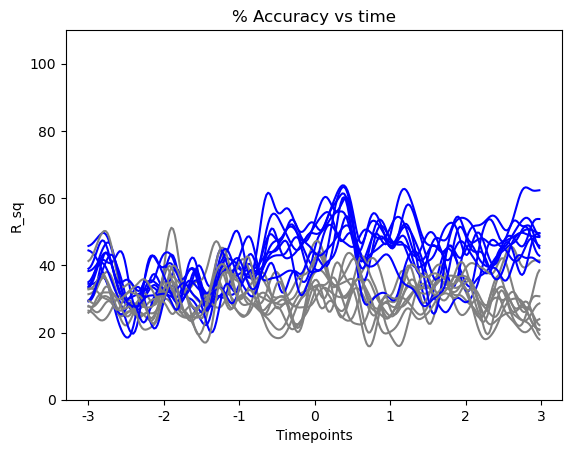

In [36]:
%matplotlib inline
fig, ax = plt.subplots()
for i in range(len(adjusted_r_squared)):
    ax.plot(gaussian_filter1d(adjusted_r_squared[i], sigma=3)*100, c='blue')
    ax.plot(gaussian_filter1d(adjusted_r_squared_sh[i], sigma=3)*100, c="grey")
ax.set_title('% Accuracy vs time')
ax.set_ylabel('R_sq')
ax.set_xlabel('Timepoints')
t_show = np.arange(-3,4,1)
ticknum = len(t_show)
idx_ticks = np.linspace(0, len_trial_25, ticknum)
ax.set_xticklabels(t_show)
ax.set_xticks(idx_ticks)
plt.ylim([0,110])
#plt.savefig('RESULTS/NOT-INJECTED/PCA_finalpictures/SVM/decoderEPM_accuracy_'+decodertype+'.svg')
plt.show()

0
1
2
3
4
5
6
7
8
9


C:\Users\ycouderc\AppData\Local\Temp\ipykernel_13844\2203211345.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_show)


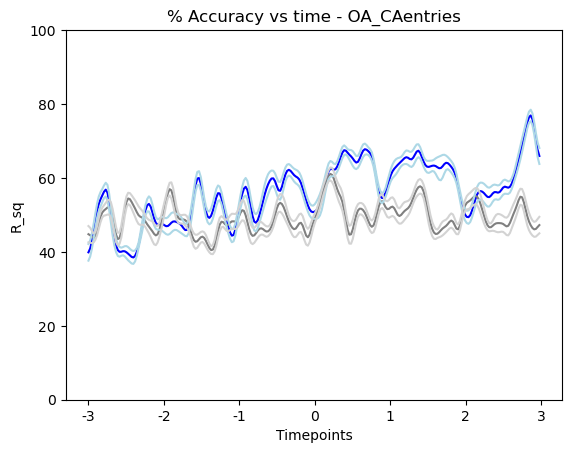

In [ ]:
def decoder_3c2(trials_final_real,trials_final_sh, trialtype_select, title, dataset_num, l_traj_stats):
    np.random.seed(50)
    datasets_real_1 = PCA_decoders.dataset_permute_bootstrapper(dataset_num=10,trials_final=trials_final_real, trialtype_select=trialtype_select)
    datasets_sh_1 = PCA_decoders.dataset_permute_bootstrapper(dataset_num=10,trials_final=trials_final_sh, trialtype_select=trialtype_select)
    decodertype = "svm"
    adjusted_r_squared, adjusted_r_squared_sh=[], []
    for i in range(dataset_num):
        print(i)
        x,oa,ca, hd = PCA_decoders.decoder(l_traj_stats=datasets_real_1[i], decodertype=decodertype,num_trials=2)
        adjusted_r_squared.append(x)
        x,oa,ca, hd = PCA_decoders.decoder(l_traj_stats=datasets_sh_1[i], decodertype=decodertype, num_trials=2)
        adjusted_r_squared_sh.append(x)
      

    fig, ax = plt.subplots()
    mean_real_adj = np.mean(adjusted_r_squared, axis=0)
    mean_sh_adj = np.mean(adjusted_r_squared_sh, axis=0)
    stdd_real_adj = sem(adjusted_r_squared, axis=0) # change to sem 
    stdd_sh_adj = sem(adjusted_r_squared_sh, axis=0)

    ax.plot((mean_real_adj)*100, c='blue')
    ax.plot((mean_sh_adj)*100, c="grey")
    ax.plot((mean_real_adj-stdd_real_adj)*100,c='lightblue')
    ax.plot((mean_real_adj+stdd_real_adj)*100,c='lightblue')
    ax.plot((mean_sh_adj-stdd_sh_adj)*100,c='lightgrey')
    ax.plot((mean_sh_adj+stdd_sh_adj)*100,c='lightgrey')

    ax.set_title('% Accuracy vs time - '+title)
    ax.set_ylabel('R_sq')
    ax.set_xlabel('Timepoints')
    t_show = np.arange(-3,4,1)
    ticknum = len(t_show)
    idx_ticks = np.linspace(0, int((l_traj_stats[0].shape[0])/3), ticknum)
    ax.set_xticklabels(t_show)
    ax.set_xticks(idx_ticks)
    plt.ylim([0,100])
    # plt.savefig('RESULTS/NOT-INJECTED/PCA_finalpicturesNew/SVM/decoderEPM_accuracy_'+title+'.svg')
    plt.show()

    return adjusted_r_squared,adjusted_r_squared_sh


adjusted_r_squared_OACA,adjusted_r_squared_sh_OACA = decoder_3c2(trials_final_real,trials_final_sh, trialtype_select=np.array([0,2]), title="OA_CAentries", dataset_num=dataset_num, l_traj_stats=l_traj_stats)